# CH13. 퀀트 전략을 이용한 종목 선정

주가, 재무재표, 가치지표 등의 데이터가 준비되었다면 퀀트 전략을 활용해 종목 선정 진행

퀀트 투자 전략</br>
1. 포트폴리오 운용 전략:
- 과거 주식 시장을 분석하여 좋은 주식의 기준을 찾고, 해당 기준에 맞는 종목을 매수하거나 나쁜 종목을 공매도
- 느린 투자 속도를 가지며, 여러 종목을 하나의 포트폴리오로 구성하여 운영하는 특징
- 예시. PER, PBR, PSR 등의 가치지표를 통해 저평가된 주식을 매수하여 장기적인 수익을 추구
2. 트레이딩 전략:
- 주식의 가격 움직임을 연구하여 각종 지표를 활용해 매수 또는 매도합니다.
- 빠른 투자 속도를 가지며, 소수의 종목을 대상으로 합니다.
- 예시. 단기(20일) 이동 평균선과 장기(50일) 이동 평균선의 골든 크로스(단기가 장기 상향 돌파) 때 매수, 데드 크로스(단기가 장기 하향 돌파) 때 매도
- 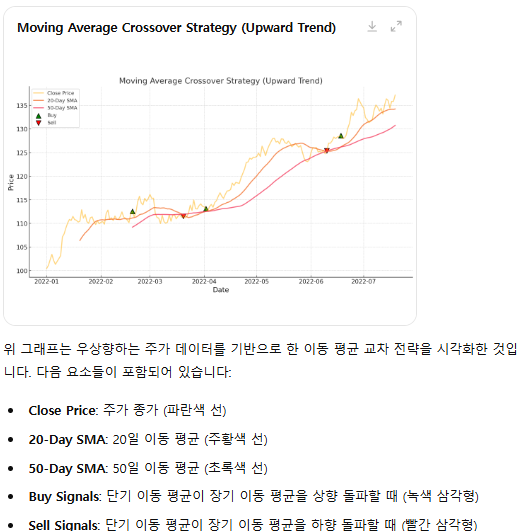

요약표

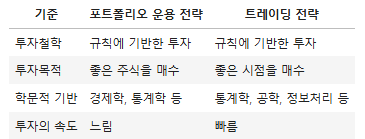

In [2]:
import pickle
with open('D:/01_study/qaunt/ch13/data/stock_db.pkl', 'rb') as f:
    data = pickle.load(f)

ticker_list = data[0]   # 티커
sector_list = data[1]   # 섹터
price_list = data[2]    # 주가
fs_list = data[3]       # 재무제표
value_list = data[4]    # 밸류지표(TTM)

In [3]:
ticker_list.head()

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,8770.0,2.449590e+11,2024-05-08,991.0,13413.0,180.0,보통주
1,000040,KR모터스,KOSPI,1047.0,3.050210e+10,2024-05-08,NaN,618.0,0.0,보통주
2,000050,경방,KOSPI,7750.0,2.124680e+11,2024-05-08,NaN,29623.0,125.0,보통주
3,000070,삼양홀딩스,KOSPI,67600.0,5.789450e+11,2024-05-08,22269.0,257475.0,3500.0,보통주
4,000075,삼양홀딩스우,KOSPI,54800.0,1.666240e+10,2024-05-08,NaN,NaN,3550.0,우선주


In [4]:
ticker_list['기준일'].value_counts()

기준일
2024-05-08    2683
Name: count, dtype: int64

In [8]:
import pandas as pd
ticker_list['기준일'] = pd.to_datetime(ticker_list['기준일'])
print(ticker_list['기준일'].min())
print(ticker_list['기준일'].max())

2024-05-08 00:00:00
2024-05-08 00:00:00


In [9]:
sector_list.head()

,IDX_CD,CMP_CD,CMP_KOR,SEC_NM_KOR,기준일
0,G35,000020,동화약품,건강관리,2024-05-08
1,G25,000040,KR모터스,경기관련소비재,2024-05-08
2,G25,000050,경방,경기관련소비재,2024-05-08
3,G15,000070,삼양홀딩스,소재,2024-05-08
4,G30,000080,하이트진로,필수소비재,2024-05-08


In [10]:
price_list.head()

,날짜,시가,고가,저가,종가,거래량,종목코드
0,2014-05-12,6030.0,6040.0,5880.0,5940.0,66300.0,000020
1,2014-05-12,19642.0,20265.0,19117.0,19389.0,162613.0,000040
2,2014-05-12,13450.0,13450.0,13250.0,13300.0,324.0,000050
3,2014-05-12,70300.0,70400.0,68900.0,68900.0,6221.0,000070
4,2014-05-12,24350.0,24400.0,23100.0,23250.0,523655.0,000080


In [11]:
fs_list.head(10)

,계정,기준일,값,종목코드,공시구분
0,(재무활동으로 인한 현금유출액),2020-12-31,38.0,007330,y
1,(재무활동으로 인한 현금유출액),2021-12-31,6.0,007330,y
2,(재무활동으로 인한 현금유출액),2022-12-31,7.0,007330,y
3,(재무활동으로 인한 현금유출액),2023-03-31,19.0,007330,q
4,(재무활동으로 인한 현금유출액),2023-12-31,24.0,007330,y
5,(재무활동으로인한현금유출액),2020-12-31,31.0,000020,y
6,(재무활동으로인한현금유출액),2020-12-31,966.0,000040,y
7,(재무활동으로인한현금유출액),2020-12-31,4345.0,000050,y
8,(재무활동으로인한현금유출액),2020-12-31,3246.0,000070,y
9,(재무활동으로인한현금유출액),2020-12-31,2320.0,000080,y


In [19]:
fs_list['계정'].value_counts()

계정
자본                   19093
자본금                  19093
자산                   19093
부채                   19093
유형자산                 19085
                     ...  
상각후원가측정 금융자산             1
자산재평가손실환입                1
전기오류수정손실                 1
당기손익인식(지정)금융자산의증가        1
주식보상비용환입                 1
Name: count, Length: 534, dtype: int64

In [12]:
value_list.head(10)

,종목코드,기준일,지표,값
0,000020,2024-05-08,DY,0.0205
1,000020,2024-05-08,PBR,0.6165
2,000020,2024-05-08,PCR,8.3604
3,000020,2024-05-08,PER,8.6558
4,000020,2024-05-08,PSR,0.6784
5,000040,2024-05-08,PBR,1.1720
6,000040,2024-05-08,PCR,-3.5060
7,000040,2024-05-08,PER,-1.4456
8,000040,2024-05-08,PSR,0.3891
9,000050,2024-05-08,DY,0.0161


In [13]:
value_list['기준일'].value_counts()

기준일
2024-05-08    10699
Name: count, dtype: int64

## 13.1 팩터 이해하기

#### ● 팩터의 개념
- **팩터(Factor)**: 주식의 수익률에 영향을 미치는 특성.
  - 예: 기업의 크기, 주가 지표(PER, PBR, PSR) 등.
  - 주식의 특성을 분석해 오를만한 주식과 내릴만한 주식을 구분 가능.

#### ● 팩터 조건
1. **지속성**: 오랜 기간 동안, 다양한 경제 상황에서도 꾸준히 작동해야 함.
2. **범용성**: 특정 국가나 섹터에 국한되지 않고, 다양한 국가, 지역, 자산군에서 작동해야 함.
3. **이해 가능성**: 경제학적, 이론적으로 설명 가능해야 함.
4. **강건성**: 같은 팩터 정의(가치주를 정의하는 PER, PBR, PSR 등)가 다소 달라도 일관되게 작동해야 함.
5. **투자 가능성**: 실제 투자에서 수수료, 세금, 법률적 문제를 극복할 수 있어야 함.

#### ● 팩터를 통한 퀀트 운용 전략
- **양의 강도 팩터**: 팩터의 강도가 양인 종목은 향후 수익률이 높을 것으로 예상되어 매수.
- **음의 강도 팩터**: 팩터의 강도가 음인 종목은 향후 수익률이 낮을 것으로 예상되어 매수하지 않거나 공매도.

#### ● 예시
- **가치 팩터**: PER, PBR, PSR 등으로 주가 대비 저평가된 주식을 찾는 것
- **모멘텀 팩터**: 12개월, 3개월 주가 상승률을 통해 최근 상승세가 지속될 것으로 예상되는 주식을 찾는 것.


## 13.2 베타 이해하기

**베타(Beta)**: 개별 주식이 전체 주식시장의 변동에 반응하는 정도를 나타내는 값.

### ● 베타에 따른 개별 주식의 수익률 움직임

| 베타 | 주식시장이 +1% 일 경우 | 주식시장이 -1% 일 경우 |
|------|-------------------------|-------------------------|
| 0.5  | +0.5%                   | -0.5%                   |
| 1.0  | +1.0%                   | -1.0%                   |
| 1.5  | +1.5%                   | -1.5%                   |

  - 베타가 1: 주식시장과 움직임이 동일.
  - 베타가 1.5: 주식시장이 +1%일 때, 개별 주식은 +1.5% 움직임.
  - 베타가 0.5: 주식시장이 +1%일 때, 개별 주식은 +0.5% 움직임.

- **베타가 큰 주식**: 주식시장보다 수익률의 움직임이 큼.
- **베타가 낮은 주식**: 주식시장보다 수익률의 움직임이 작음.
- 상승장이 기대될 때는 베타가 큰 주식, 하락장이 기대될 때는 베타가 낮은 주식에 투자하는 것이 좋음.

### ● 회귀분석모형과 자산가격결정모형(CAPM: Capital Asset Pricing Model)
베타는 통계학의 회귀분석모형에서 기울기를 나타내는 베타와 의미가 같다.
- **회귀분석모형**: y=a+bx
- **자산가격결정모형(CAPM)**:

### ● 회귀분석모형과 자산가격결정모형의 비교

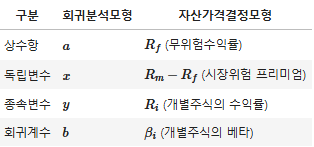

- 회귀 계수 수식 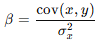
  - cov(x,y)는 두 변수 x와 y 사이의 공분산입니다.
  - 분모: 독립변수 x의 분산
- x와 y가 시장수익률과 개별 주식의 수익률이라면 주식 시장에서는 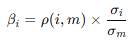
  - ρ(i,m)는 개별 주식 𝑖와 시장 𝑚 사이의 상관계수
  - σi는 개별 주식 𝑖의 표준편차입니다.
  - σm는 시장 𝑚의 표준편차입니다.
- 통계학에서 회귀계수는  형태로 구할 수 있으며, 와 에 각각 시장수익률과 개별주식의 수익률을 대입할 경우 개별주식의 베타는  형태로 구할 수 있음.
- 파이썬을 이용하면 함수로 간단히 베타를 구할 수 있음.

### → CAPM은 자산 가격 결정, 포트폴리오 최적화, 자본 비용 계산, 시장 효율성 평가, 그리고 위험 조정 성과 평가 등 다양한 목적으로 사용</br>
### &nbsp;&nbsp;&nbsp; 투자자들과 기업들이 더 나은 의사 결정을 내리는 데 도움

### 13.2.1 베타 계산하기

KOSPI지수(^KS11)와 키움증권(039490.KS)을 이용한 베타 구하기

In [14]:
import yfinance as yf
import pandas as pd

# KOSPI 코드(^KS11)와 증권주인 키움증권의 티커(039490.KS)를 입력
tickers = ['^KS11', '039490.KS'] 

all_data = {}
for ticker in tickers:
    # DataReader() 함수를 이용하여 해당 티커들의 2016년부터 2021년까지 데이터를 다운로드
    all_data[ticker] = yf.download(ticker, start="2016-01-01", end='2021-12-31') 
    
# 종가(Close)에 해당하는 열만 선택한 후, 데이터프레임 형태로 변환
prices = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})
prices

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,^KS11,039490.KS
Date,,
2016-01-04,1918.760010,59800.0
2016-01-05,1930.530029,61500.0
2016-01-06,1925.430054,61100.0
2016-01-07,1904.329956,59500.0
2016-01-08,1917.619995,59700.0
...,...,...
2021-12-24,3012.429932,109500.0
2021-12-27,2999.550049,108500.0
2021-12-28,3020.239990,109000.0


In [15]:
# 수익률 계산 후, na 데이터 삭제
# pct_change()의 period 매개변수 1
ret = prices.pct_change().dropna()
ret

,^KS11,039490.KS
Date,,
2016-01-05,0.006134,0.028428
2016-01-06,-0.002642,-0.006504
2016-01-07,-0.010959,-0.026187
2016-01-08,0.006979,0.003361
2016-01-11,-0.011879,-0.028476
...,...,...
2021-12-24,0.004756,0.000000
2021-12-27,-0.004276,-0.009132
2021-12-28,0.006898,0.004608


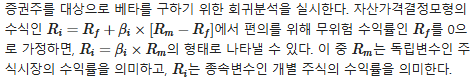

In [16]:
import statsmodels.api as sm

# ret['intercept'] = 1 # 먼저 알파를 계산하기 위헤 intercept(절편)에 해당하는 열에 1을 입력
X = ret[['^KS11']]  # KOSPI 지수의 수익률 데이터를 선택하여 X에 저장
X = sm.add_constant(X)  # 절편(intercept) 열을 추가

y = ret[['039490.KS']]  # 키움증권의 수익률 데이터를 선택

# 회귀 분석을 수행
# reg = sm.OLS(ret[['039490.KS']], ret[['^KS11', 'intercept']]).fit()
reg = sm.OLS(y, X).fit()

In [17]:
print(X)

            const     ^KS11
Date                       
2016-01-05    1.0  0.006134
2016-01-06    1.0 -0.002642
2016-01-07    1.0 -0.010959
2016-01-08    1.0  0.006979
2016-01-11    1.0 -0.011879
...           ...       ...
2021-12-24    1.0  0.004756
2021-12-27    1.0 -0.004276
2021-12-28    1.0  0.006898
2021-12-29    1.0 -0.008923
2021-12-30    1.0 -0.005225

[1472 rows x 2 columns]


- reg는 회귀 분석 결과를 저장하는 객체로, 회귀 계수, 알파(절편), 베타(기울기) 등의 정보를 포함
- 절편(intercept): 회귀 방정식에서 독립 변수(X)가 0일 때 종속 변수(y)의 값을 나타내며, 여기서는 알파(초과 수익률)를 의미
- 기울기(slope): 독립 변수(X)의 변화에 따라 종속 변수(y)가 얼마나 변화하는지를 나타내며, 여기서는 베타(시장 민감도)를 의미

- OLS(Ordinary Least Squares, 최소자승법)는 회귀 분석에서 가장 일반적으로 사용되는 방법 중 하나로, 종속 변수와 독립 변수 간의 관계를 추정하는 데 사용
- OLS는 주어진 데이터를 가장 잘 설명하는 직선(회귀선)을 찾기 위해, 실제 데이터 점들과 회귀선 사이의 거리를 최소화하는 방식으로 회귀 계수를 추정

※ OLS 회귀 모델

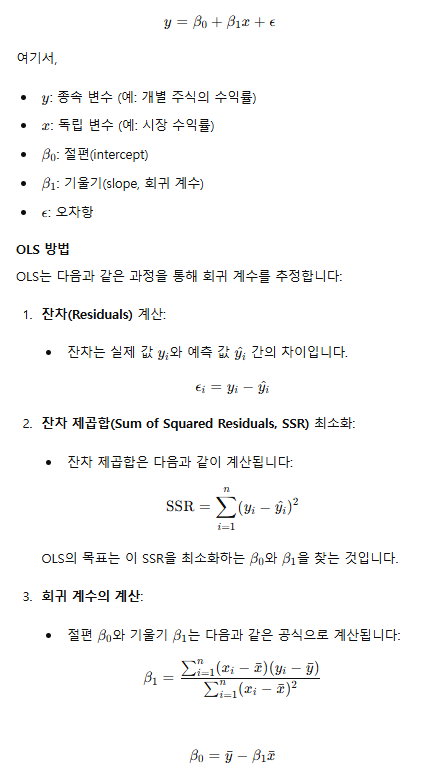

In [12]:

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              039490.KS   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     860.1
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          3.07e-149
Time:                        17:21:41   Log-Likelihood:                 3691.2
No. Observations:                1472   AIC:                            -7378.
Df Residuals:                    1470   BIC:                            -7368.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.376      0.707      -0.001       0.001
^KS11          1.4333      0.049     29.328      0.000       1.337       1.529
==============================================================================
Omnibus:                      223.609   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.755
Skew:                           0.812   Prob(JB):                    8.64e-129
Kurtosis:                       5.642   Cond. No.                         95.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

→ 해석: 베타값이 약 1.43으로 높아 증권주의 특성인 고베타주임이 확인되며, t값 또한 약 29로써 유의성을 가르는 2 보다 크므로 결과가 유의하다고 볼 수 있다.</br> 반면 알파(intercept)는 0.0002 수준이며 t값 역시 0.376으로 매우 낮아, 증권주의 수익률은 주식 시장에 대한 노출도인 베타를 제외하고 나면 초과 수익이 없다고 볼 수 있다</br>
이는 주식 시장의 움직임 외에 별도의 추가적인 수익을 제공하지 않는다는 의미

- 초과 수익(알파)은 자산이 시장 수익률을 초과하여 창출한 추가 수익을 나타냅니다. 
- 회귀 분석을 통해 알파를 추정하고, 이를 통해 자산의 성과를 평가할 수 있습니다.
- 알파가 양수이면서 유의미한 경우, 해당 자산이 시장 대비 초과 수익을 창출했음을 나타냅니다.
- 반면, 알파가 유의하지 않은 경우(통계적 결과가 우연에 의해 발생했을 가능성이 높다), 해당 자산은 시장 수익률 외에 별도의 추가적인 수익을 제공하지 않는다고 볼 수 있습니다.
- 알파가 0이라는 귀무가설을 기각할 수 없으면, 알파가 0이라는 주장을 받아들입니다.

※일반적으로, t값이 2보다 크면 해당 회귀 계수가 유의미하다고 판단
- 알파의 t값이 0.376이고, 이는 유의수준보다 낮기 때문에, 알파가 0이라는 귀무가설을 기각할 수 없습니다.
- 따라서, 증권주의 수익률은 주식 시장의 변동에 대한 노출도(베타)를 제외하고는 초과 수익이 없다고 볼 수 있습니다.

※ 초과 수익의 중요성
- 긍정적 알파: 자산이 시장을 능가하는 성과를 냈음을 의미하며, 이는 해당 자산이 추가적인 가치를 창출했음을 나타냅니다.
- 부정적 알파: 자산이 시장보다 저조한 성과를 냈음을 의미하며, 이는 해당 자산이 기대 이하의 성과를 보였음을 나타냅니다

- R-squared: 모델의 설명력 (0에서 1 사이의 값으로, 1에 가까울수록 더 잘 설명됨)
- coefficients: 회귀 계수 (절편과 기울기)
- p-values: 회귀 계수의 통계적 유의성
- standard errors: 회귀 계수의 표준 오차

※ 베타와 알파 값만 확인

In [13]:
print(reg.params)

const    0.000193
^KS11    1.433309
dtype: float64


## 13.3 밸류 전략

### 가치주 효과
- **가치주 효과**란 내재 가치 대비 낮은 가격의 주식(저PER, 저PBR 등)이 내재 가치 대비 비싼 주식(고PER, 고PBR)보다 수익률이 높은 현상을 뜻합니다.

#### 원인
- **가치주 기피, 성장주 선호**: 사람들이 가치주(저밸류에이션)를 기피하고, 성장주(고밸류에이션)를 선호하기 때문입니다.
- **위험 인식**: 가치주는 차입비율이 높고(자본 중 많은 부분을 부채로 조달), 수익의 변동성이 크며, 경기 침체 시 더 위험한 경향이 있습니다.
- **과민 반응**: 사람들은 이러한 위험 주식에 필요 이상으로 과민 반응을 보이며, 그로 인해 주가가 하락하고 가치주가 됩니다.
- **안전 착각**: 최근 성과가 좋은 주식은 여러 매체를 통해 접하기 쉬운데, 이를 안전하다고 착각해 많은 사람이 매수에 나섭니다. 그로 인해 주가가 상승하고 고평가주가 됩니다.

#### 투자자 심리
- **확증 편향**: 투자자들은 위험하다고 생각되는 가치주가 망할 이유만 찾아 기피하고, 안전하다고 생각되는 성장주는 영원히 상승할 이유만 찾아 선호합니다.
- **회귀**: 그러나 가치주가 생각보다 위험하지 않다는 것을, 성장주가 너무 많이 상승해 안전하지 않다는 것을 깨닫는 순간 주가는 원래 수준으로 회귀하며, 이로 인해 가치주 효과가 발생합니다.

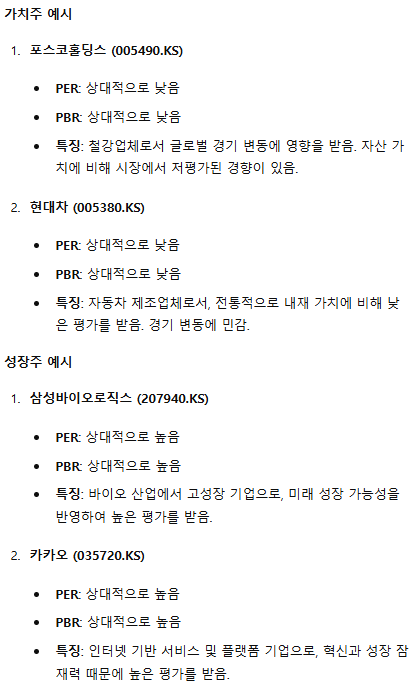

#### 요약
- 가치주: 현재 주가가 내재 가치에 비해 저평가된 주식. 예: 포스코홀딩스, 현대차.
- 성장주: 높은 성장 잠재력으로 인해 현재 주가가 높게 평가된 주식. 예: 삼성바이오로직스, 카카오.

### 13.3.1 DataReader() 함수를 이용한 팩터 데이터 다운로드

실제로 가치주 효과가 있는지 데이터로 확인</br>
Farma-French 3Factor로 유명한 Kenneth French 교수 Data Library에 각종 팩터에 관한 수익률이 업데이트되고 있음</br>
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [18]:
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets

datasets = get_available_datasets()
datasets[1:20]

['F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly']

홈페이지에서 원하는 팩터를 검색한 후, [CSV] 글자에서 마우스를 우클릭 해 [링크 주소 복사]</br>
복사된 https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Portfolios_Formed_on_BE-ME_CSV.zip에서<br>
 '_CSV' 를제외한 글자 Portfolios_Formed_on_BE-ME를 DataReader()에 입력하여 다운로드

### 13.3.2 PBR별 포트폴리오의 수익률

 'Portfolios_Formed_on_BE-ME'의 B/M에서 B는 장부가치(Book Value), M는 시장가치(Market Value)</br>
 주가순자산비율(BE/ME, 즉 Book Equity-to-Market Equity)</br>
 이는 PBR의 역수라고 생각해도 된다.</br>
 해당값이 높을수록 저PBR 주식을 의미</br>
 *PBR (Price-to-Book Ratio): 주가를 주당 순자산으로 나눈 값. 낮을수록 저평가된 주식으로 간주.

※ 참고
- 장부가치 (Book Equity): 기업의 자산에서 부채를 뺀 값으로, 회사의 순자산을 의미합니다. 이는 회계 장부에 기록된 가치입니다.
- 시장가치 (Market Equity): 기업의 주식 시장에서의 가치로, 주식의 시장 가격에 발행 주식 수를 곱한 값입니다.

In [15]:
import pandas_datareader.data as web

df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME', 'famafrench', start='1900-01-01') # start는 가능한 가장 오래된 데이터를 불러오기 위해...
df_pbr[0].head()

C:\Users\naare\AppData\Local\Temp\ipykernel_9048\1685208170.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME', 'famafrench', start='1900-01-01') # start는 가능한 가장 오래된 데이터를 불러오기 위해...
C:\Users\naare\AppData\Local\Temp\ipykernel_9048\1685208170.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME', 'famafrench', start='1900-01-01') # start는 가능한 가장 오래된 데이터를 불러오기 위해...
C:\Users\naare\AppData\Local\Temp\ipykernel_9048\1685208170.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in 

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1926-07,12.07,5.55,1.86,1.54,3.18,5.41,1.78,2.41,0.60,4.63,1.22,11.38,1.68,1.50,2.12,2.40,2.45,0.63,0.52
1926-08,-9.73,2.65,2.67,5.61,1.00,4.01,2.05,4.59,7.10,0.15,2.19,6.39,2.38,1.58,2.62,4.77,4.17,8.31,3.92
1926-09,-15.16,1.28,0.07,-0.71,-1.04,3.04,-0.29,-0.19,-1.46,-0.11,-2.32,6.30,0.73,-0.89,0.40,-0.28,0.04,-2.16,0.44
1926-10,-5.63,-3.60,-2.41,-3.55,-2.89,-2.96,-2.20,-4.20,-4.28,-3.78,-1.67,-5.01,-1.41,-2.31,-2.07,-4.77,-2.84,-5.46,-1.17
1926-11,5.58,3.13,2.95,2.94,4.12,2.56,1.90,3.96,2.48,6.03,1.51,1.10,3.63,1.97,1.81,4.20,3.39,2.77,1.76


df_pbr[0]는 개별 주식이 아닌, 주가순자산비율에 따라 형성된 각 포트폴리오의 월별 수익률을 나타냄

- Date: 각 기간(월별)의 날짜입니다.
- Lo 20: BE/ME 비율이 가장 낮은 20% 주식 포트폴리오의 평균 BE/ME 비율
- Qnt 2: BE/ME 비율이 하위 20~40%에 해당하는 주식 포트폴리오의 평균 BE/ME 비율
- Qnt 3: BE/ME 비율이 하위 40~60%에 해당하는 주식 포트폴리오의 평균 BE/ME 비율
- Qnt 4: BE/ME 비율이 하위 60~80%에 해당하는 주식 포트폴리오의 평균 BE/ME 비율
- Hi 20: BE/ME 비율이 가장 높은 20% 주식 포트폴리오의 평균 BE/ME 비율
</br></br>
- <=0: PBR이 0 이하인 기업들의 포트폴리오
- Lo 30, Med 40, Hi 30: PBR 기준 상위 30%, 30-70%, 하위 30%로 나눈 포트폴리오
- Lo 10, Dec 2, Dec 3, ..., Dec 9, Hi 19: PBR 기준 상위 10% 씩으로 나눈 포트폴리오

In [16]:
df_pbr[1].head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1926-07,-6.29,2.66,1.08,0.42,3.01,2.03,1.00,1.56,-0.81,4.52,1.53,1.99,2.07,0.07,1.96,0.23,2.88,-1.44,-0.17
1926-08,34.52,1.29,1.55,5.59,0.43,1.90,2.23,2.72,6.15,0.34,0.51,3.00,0.81,2.79,1.66,0.96,4.49,5.81,6.48
1926-09,-5.04,-1.70,-0.36,0.10,-1.97,-0.14,-0.92,-0.98,0.88,0.36,-4.25,-1.16,0.88,-0.74,-1.10,-0.50,-1.45,-2.17,3.93
1926-10,-7.11,-3.54,-3.31,-2.83,-3.98,-2.72,-3.14,-3.10,-3.23,-4.12,-3.83,-2.67,-2.78,-2.31,-3.98,-4.18,-2.01,-4.58,-1.88
1926-11,-5.83,2.07,3.25,2.80,2.43,2.90,2.51,3.51,2.44,4.44,0.47,1.35,4.45,3.56,1.47,3.51,3.51,2.23,2.66


In [17]:
df_pbr[2].head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1927,13.99,44.07,23.41,32.36,44.90,31.16,23.11,26.81,40.66,57.86,25.60,42.91,20.22,20.37,25.96,28.34,24.74,38.24,48.27
1928,88.57,45.78,31.62,34.63,48.42,38.14,34.69,22.70,35.97,48.57,50.02,39.59,37.39,46.70,25.73,14.92,33.23,37.35,27.71
1929,-53.50,-19.82,-1.42,-9.71,-21.82,-9.63,-2.37,-3.50,-11.49,-26.86,-8.80,-13.38,-6.62,-0.39,-1.41,0.07,-8.37,-8.27,-25.39
1930,-74.10,-26.33,-28.88,-43.62,-26.10,-26.80,-27.90,-38.95,-52.71,-29.12,-20.56,-26.97,-26.85,-25.33,-35.07,-38.47,-40.58,-52.64,-56.32
1931,-74.64,-36.78,-59.69,-54.92,-36.18,-44.79,-62.51,-59.72,-51.84,-37.53,-33.93,-37.80,-53.84,-60.49,-63.04,-62.86,-55.44,-50.79,-55.62


In [18]:
df_pbr[3].head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1927,50.99,34.69,26.84,38.85,35.59,32.47,25.60,27.98,42.04,43.29,28.35,32.75,32.16,28.91,22.31,23.82,32.30,41.81,41.94
1928,88.57,40.52,38.85,45.35,41.27,43.60,35.80,29.73,56.92,42.29,39.99,38.99,48.00,41.95,29.80,35.78,23.81,51.10,62.35
1929,-39.66,-32.38,-26.31,-34.89,-32.99,-31.20,-24.93,-28.04,-36.51,-32.78,-33.37,-31.29,-31.14,-19.30,-30.18,-24.25,-31.69,-35.02,-38.07
1930,-68.72,-33.21,-34.99,-44.68,-33.26,-31.09,-36.47,-40.57,-45.73,-35.42,-31.17,-33.39,-28.94,-36.30,-36.71,-38.24,-42.91,-44.03,-47.69
1931,-46.23,-40.15,-49.41,-43.29,-39.83,-42.89,-50.73,-49.42,-40.88,-37.68,-41.94,-40.89,-44.94,-51.38,-50.15,-51.18,-47.88,-43.06,-39.27


df_pbr[0]에서 20%씩 나눈 [Lo 20, Qnt 2, Qnt 3, Qnt 4, Hi 20] 열만 선택하여 누적 수익률을 확인

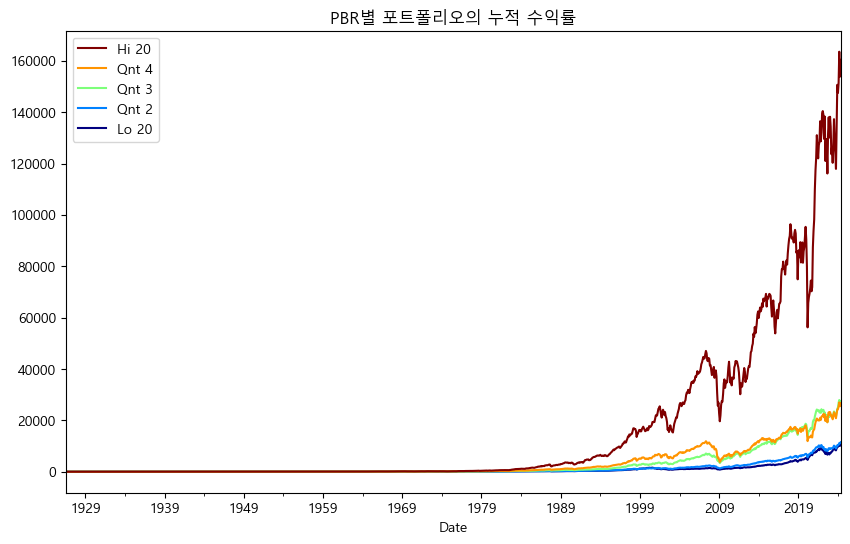

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm

# 폰트 설정 및 유니코드 마이너스 기호를 쓰지 않도록 설정
plt.rc('font', family='Malgun Gothic')
# 하이픈(-, U+002D)과 유니코드 마이너스(−, U+2212)의 차이
plt.rc('axes', unicode_minus=False)

# 원하는 열만 선택
df_pbr_vw = df_pbr[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
# 해당 사이트의 데이터는 1이 1%를 의미하므로, 올바른 계산을 위해 100으로 나누어준 후 cumprod() 메서드를 통해 누적 수익률을 계산
df_pbr_cum = (1 + df_pbr_vw / 100).cumprod()
df_pbr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PBR별 포트폴리오의 누적 수익률')
plt.show()

→ 해석: B/M 값이 높을 수록, 즉 PBR이 낮을 수록(Hi 20) 수익률이 높은 가치주 효과가 확인

--------------------------------

※ cumprod()는 파이썬의 pandas 라이브러리에서 제공하는 메서드로, 누적 곱을 계산합니다. 이 메서드는 시리즈나 데이터프레임의 각 요소에 대해 이전 요소까지의 모든 곱을 계산하여 반환합니다.

In [20]:
import pandas as pd

# 예제 데이터프레임 생성
data = {'A': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# 누적 곱 계산
df['Cumulative Product'] = df['A'].cumprod()

print(df)

   A  Cumulative Product
0  1                   1
1  2                   2
2  3                   6
3  4                  24
4  5                 120


--------------------------------

y축을 단순 수익률로 볼 경우 장기적인 성장률을 왜곡

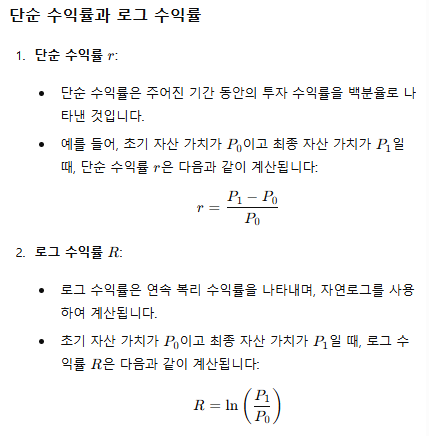

단순 수익률과 로그 수익률 간의 관계

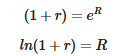

단순 수익률의 누적 수익률 계산:  </br>
로그 수익률의 누적 수익률 계산: 

로그 수익률의 장점은 여러 기간 동안의 수익률을 더할 수 있다는 점

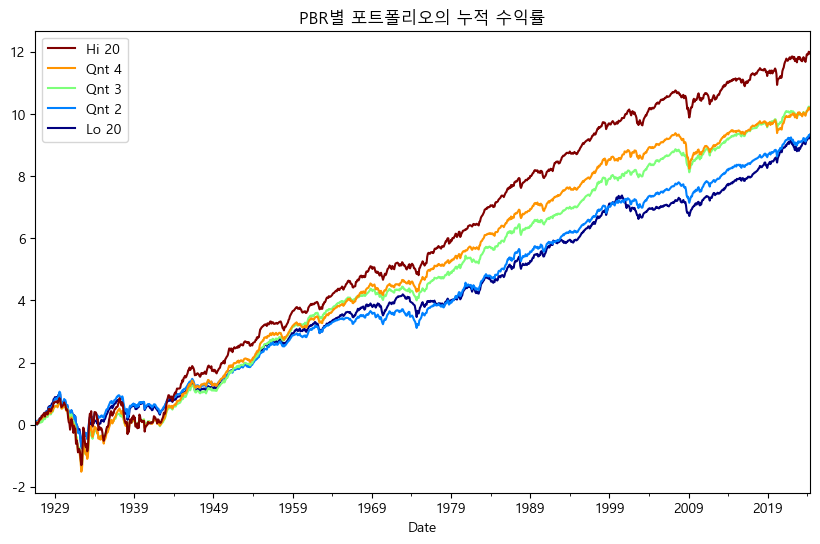

In [21]:
import numpy as np

df_pbr_cum = np.log(1+df_pbr_vw/100).cumsum()
df_pbr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PBR별 포트폴리오의 누적 수익률')
plt.show()

→ 해석: 로그 수익률로 살펴보면 앞의 그래프보다 장기적인 성장률이 훨씬 더 잘 비교

※ 단순 수익률 vs 로그 수익률

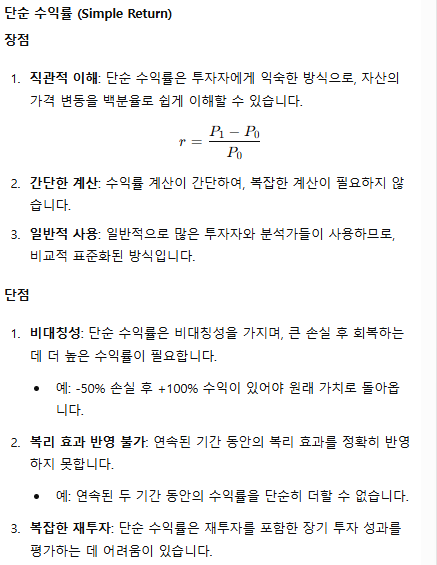 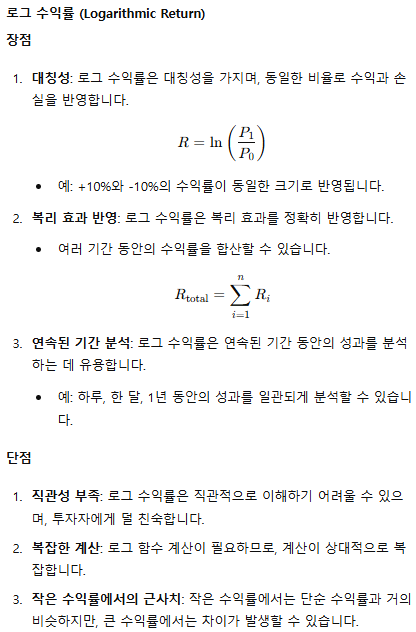

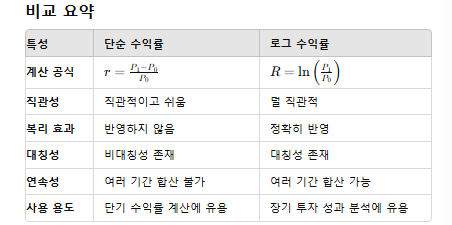

※ cumsum()은 파이썬의 numpy 및 pandas 라이브러리에서 제공하는 메서드로, 누적 합을 계산

In [22]:
import numpy as np

# 예제 데이터 생성
data = np.array([1, 2, 3, 4, 5])

# 누적 합 계산
cumulative_sum = np.cumsum(data)

print(cumulative_sum)


[ 1  3  6 10 15]


PBR별 포트폴리오의 간단한 성과를 비교(연율화 수익률(기하), 연율화 수익률(산술), 연율화 변동성 및 샤프지수를 구하는 함수)

In [23]:
import pandas as pd

def factor_stat(df):
    # len() 함수를 통해 행 갯수 계산
    n = len(df)

    # 각 열의 연간 산술평균(ret_ari)
    ret_ari = (df / 100).mean(axis=0) * 12
    # 각 열의 연간 기하평균(ret_geo): 각 수익률에 1을 더하여 성장률을 계산 후 각 열의 모든 요소를 곱하여 누적 성장률을 계산
    # n은 기간의 개수(월 수), 성장률에서 1을 빼서 최종적인 연간 기하 평균 수익률을 계산
    ret_geo = (1 + df / 100).prod()**(12 / n) - 1
    # 각 열의 변동성(vol): 표준편차(변동성)를 연간 변동성으로 환산
    # 별 데이터를 연간 변동성으로 변환하기 위해 표준편차에 sqrt(12)를 곱
    vol = (df / 100).std(axis=0) * np.sqrt(12)
    # 기하평균에서 변동성을 나누어 샤프지수: 연간 산술 평균 수익률을 연간 변동성으로 나누어 샤프 비율을 계산
    # 새프 비율 = 위험 단위당 수익률. 샤프 비율이 높을수록 위험 대비 수익이 높음을 의미.
    sharp = ret_ari / vol

    # 하나의 데이터프레임으로 묶은 후 반올림
    stat = pd.DataFrame(
        [ret_ari, ret_geo, vol, sharp],
        index=['연율화 수익률(산술)', '연율화 수익률(기하)', '연율화 변동성', '샤프지수']).round(4)

    # 산술 수익률, 기하 수익률, 변동성 항목은 100을 곱해 퍼센트 형태
    stat.iloc[0:3, ] = stat.iloc[0:3, ] * 100

    return stat

In [24]:
factor_stat(df_pbr_vw)

,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20
연율화 수익률(산술),11.2900,11.2900,12.3400,12.8500,15.9100
연율화 수익률(기하),9.9300,10.0200,11.0000,10.9700,13.0200
연율화 변동성,18.8300,18.5500,19.4700,22.3200,27.7100
샤프지수,0.5997,0.6087,0.6337,0.5757,0.5742


→ 해석: Hi 20 즉 PBR이 가장 낮은 종목들로 구성된 포트폴리오의 수익률이 가장 높으며, 반대로 Low 20 즉 PBR이 가장 높은 종목들로 구성된 포트폴리오의 수익률은 가장 낮다.

※ 연간 산술 평균 수익률 vs 연간 기하 평균 수익률

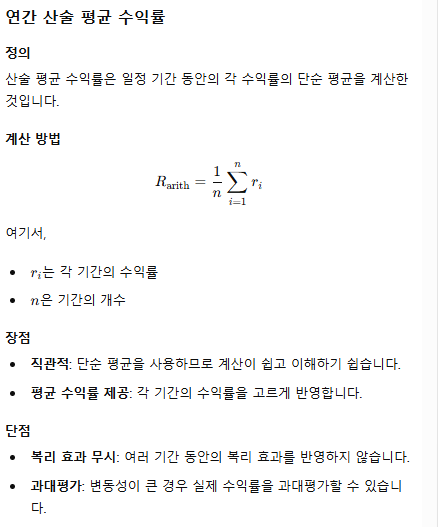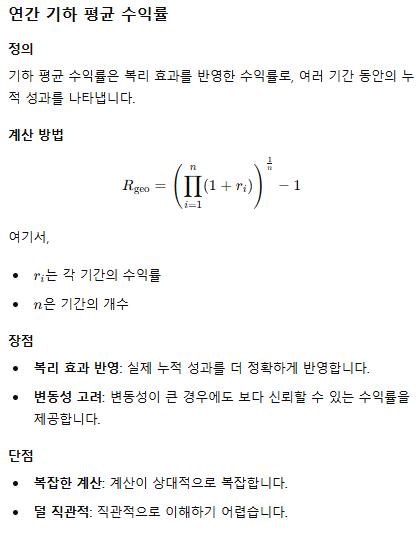 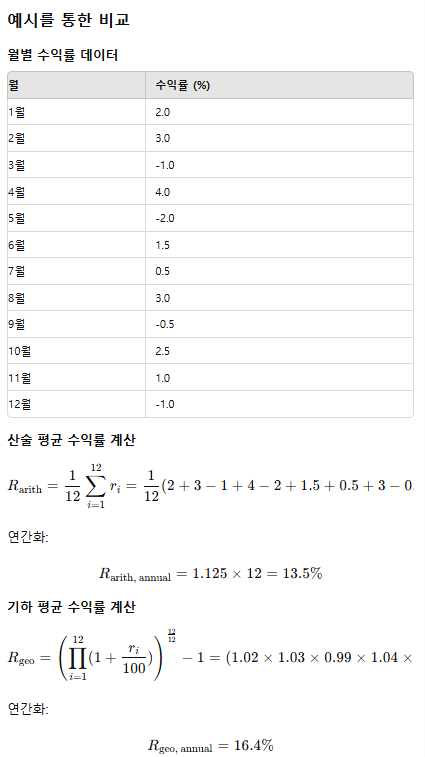

※ 연간 변동성(Annual Volatility)
- 연간 변동성은 특정 자산이나 포트폴리오의 수익률 변동 정도를 연간 기준으로 측정한 값
- 변동성은 수익률의 표준편차로 계산되며, 자산의 위험을 평가하는 데 중요한 지표로 사용


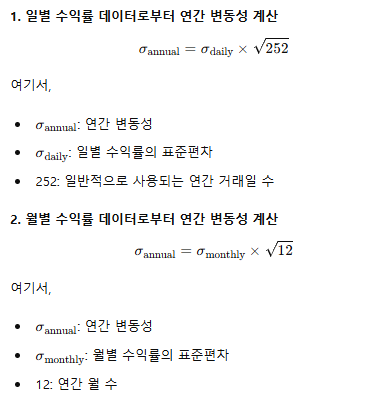

### 프렌치 라이브러리에는 B/M(PBR) 외에도 E/P(PER), CF/P(PCR) 데이터도 존재

※ 참고...

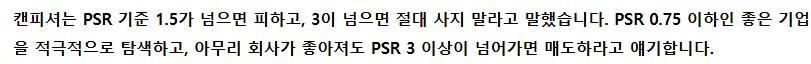

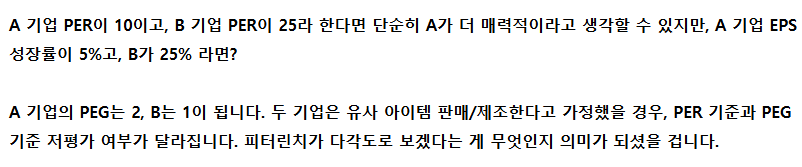

E/P지표: PER 역수

C:\Users\naare\AppData\Local\Temp\ipykernel_9048\903409442.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_per = web.DataReader('Portfolios_Formed_on_E-P',
C:\Users\naare\AppData\Local\Temp\ipykernel_9048\903409442.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_per = web.DataReader('Portfolios_Formed_on_E-P',
C:\Users\naare\AppData\Local\Temp\ipykernel_9048\903409442.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_per = web.DataReader('Portfolios_Formed_on_E-P',
C:\Users\naare\AppData\Local\Temp\ipykernel_90

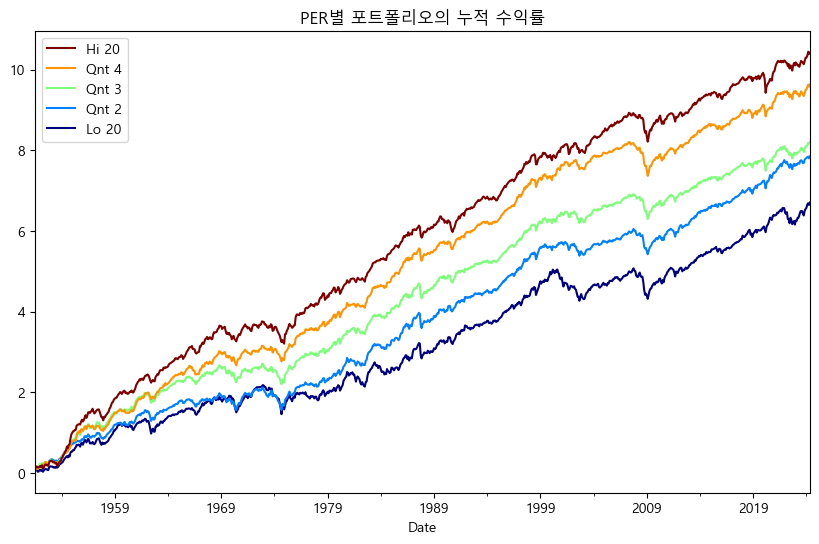

In [25]:
df_per = web.DataReader('Portfolios_Formed_on_E-P',
                        'famafrench',
                        start='1900-01-01')
df_per_vw = df_per[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_per_cum = np.log(1 + df_per_vw / 100).cumsum()
df_per_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PER별 포트폴리오의 누적 수익률')
plt.show()

→ Hi 20, 즉 PER가 낮을 수록 수익률이 높다

### PCR의 역수에 해당하는 CF/P 지표의 누적 수익률

C:\Users\naare\AppData\Local\Temp\ipykernel_9048\1137851293.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
C:\Users\naare\AppData\Local\Temp\ipykernel_9048\1137851293.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
C:\Users\naare\AppData\Local\Temp\ipykernel_9048\1137851293.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
C:\Users\naare\AppData\Local\Temp\ipyker

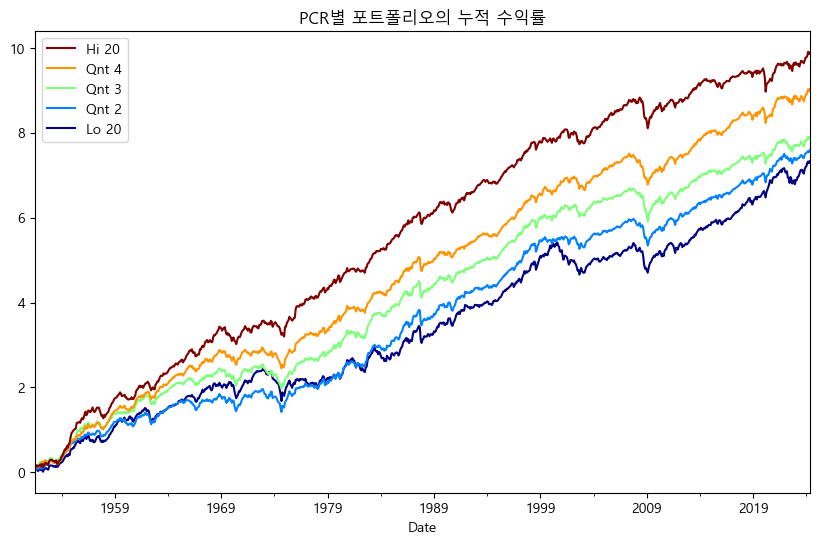

In [26]:
df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
                        'famafrench',
                        start='1900-01-01')
df_pcr_vw = df_pcr[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pcr_cum = np.log(1 + df_pcr_vw / 100).cumsum()
df_pcr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PCR별 포트폴리오의 누적 수익률')
plt.show()

→ 해석: Hi 20, 즉 PCR이 낮을 수록 수익률이 높다

#### PBR 뿐만 아니라 PER, PCR과 같은 모든 지표에서 가치주 효과가 나타난다.

### 13.3.3 밸류 포트폴리오 구하기

국내 기업 중 전통적인 가치지표인 PER와 PBR이 낮은 종목을 선정

pkl data 사용

In [188]:
import pickle
with open('D:/01_study/qaunt/ch13/data/stock_db.pkl', 'rb') as f:
    data = pickle.load(f)

ticker_list = data[0]   # 티커
sector_list = data[1]   # 섹터
price_list = data[2]    # 주가
fs_list = data[3]       # 재무제표
value_list = data[4]    # 밸류지표(TTM)

In [98]:
ticker_list.head()

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,8770.0,2.449590e+11,2024-05-08,991.0,13413.0,180.0,보통주
1,000040,KR모터스,KOSPI,1047.0,3.050210e+10,2024-05-08,NaN,618.0,0.0,보통주
2,000050,경방,KOSPI,7750.0,2.124680e+11,2024-05-08,NaN,29623.0,125.0,보통주
3,000070,삼양홀딩스,KOSPI,67600.0,5.789450e+11,2024-05-08,22269.0,257475.0,3500.0,보통주
4,000075,삼양홀딩스우,KOSPI,54800.0,1.666240e+10,2024-05-08,NaN,NaN,3550.0,우선주


In [28]:
value_list.head()

,종목코드,기준일,지표,값
0,000020,2024-05-08,DY,0.0205
1,000020,2024-05-08,PBR,0.6165
2,000020,2024-05-08,PCR,8.3604
3,000020,2024-05-08,PER,8.6558
4,000020,2024-05-08,PSR,0.6784


In [29]:
# 일부 종목은 가치지표가 0보다 작은 경우(예: 적자기업의 경우 PER가 음수, 혹은 배당수익률이 0%인 종목)가 있으며 이러한 데이터는 nan으로 변경
value_list.loc[value_list['값'] <= 0, '값'] = np.nan
# pivot() 함수를 통해 가치지표 테이블을 가로로 긴 형태로 변경
value_pivot = value_list.pivot(index='종목코드', columns='지표', values='값')
data_bind = ticker_list[['종목코드', '종목명']].merge(value_pivot, how='left', on='종목코드')

data_bind.head()

,종목코드,종목명,DY,PBR,PCR,PER,PSR
0,000020,동화약품,0.0205,0.6165,8.3604,8.6558,0.6784
1,000040,KR모터스,NaN,1.1720,NaN,NaN,0.3891
2,000050,경방,0.0161,0.2860,4.6089,NaN,0.5399
3,000070,삼양홀딩스,0.0518,0.2171,1.8926,2.5504,0.1803
4,000075,삼양홀딩스우,NaN,NaN,NaN,NaN,NaN


In [30]:
ticker_list.head()

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,8770.0,2.449590e+11,2024-05-08,991.0,13413.0,180.0,보통주
1,000040,KR모터스,KOSPI,1047.0,3.050210e+10,2024-05-08,NaN,618.0,0.0,보통주
2,000050,경방,KOSPI,7750.0,2.124680e+11,2024-05-08,NaN,29623.0,125.0,보통주
3,000070,삼양홀딩스,KOSPI,67600.0,5.789450e+11,2024-05-08,22269.0,257475.0,3500.0,보통주
4,000075,삼양홀딩스우,KOSPI,54800.0,1.666240e+10,2024-05-08,NaN,NaN,3550.0,우선주


In [31]:
value_pivot.head()

지표,DY,PBR,PCR,PER,PSR
종목코드,,,,,
000020,0.0205,0.6165,8.3604,8.6558,0.6784
000040,NaN,1.1720,NaN,NaN,0.3891
000050,0.0161,0.2860,4.6089,NaN,0.5399
000070,0.0518,0.2171,1.8926,2.5504,0.1803
000080,0.0469,1.2691,8.6440,40.0059,0.5635


In [32]:
# rank() 함수를 통해 PER와 PBR 열의 순위를 구하며, axis = 0을 입력하여 순위는 열 방향으로 구한다. 즉 PER 내에서의 순위, PBR 내에서의 순위를 구한다.
value_rank = data_bind[['PER', 'PBR']].rank(axis = 0)
# sum() 함수 내에 axis = 1를 통해 위에서 구한 순위를 행 방향으로 값을 더하며, skipna = False를 통해 NA가 있는 종목은 제외한다. 그 후 다시 rank() 함수를 통해 순위의 합 기준으로 다시 순위를 구한다.
value_sum = value_rank.sum(axis = 1, skipna = False).rank()
# value_sum <= 20 즉 순위가 낮은 20 종목을 선택한다. 이는 PER과 PBR가 낮은 종목이라고 볼 수 있다.
data_bind.loc[value_sum <= 20, ['종목코드', '종목명', 'PER', 'PBR']]

,종목코드,종목명,PER,PBR
37,000540,흥국화재,0.8617,0.1917
53,000880,한화,1.2626,0.0604
76,001230,동국홀딩스,1.1699,0.1510
85,001390,KG케미칼,1.1132,0.1114
303,005720,넥센,2.2350,0.1022
305,005740,크라운해태홀딩스,2.1912,0.1694
323,005990,매일홀딩스,1.2893,0.1577
355,006840,AK홀딩스,1.5647,0.1536
382,007700,F&F홀딩스,1.5085,0.1935
389,007860,서연,1.0540,0.1917


→ 해석: 전통적으로 PER와 PBR이 낮은 지주회사가 많이 분포

### 13.3.4 여러 지표 결합하기

각 지표 별 상관관계

PER, PBR, PCR, PSR의 경우 값이 낮을수록 가치주에 해당하지만, DY의 경우 값이 높을수록 배당수익률이 높은 가치주에 해당

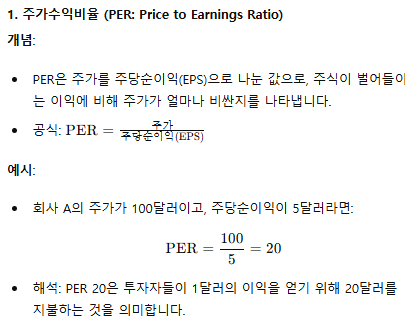 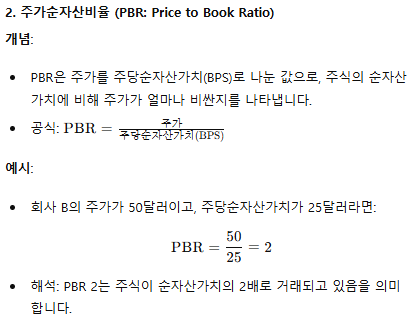 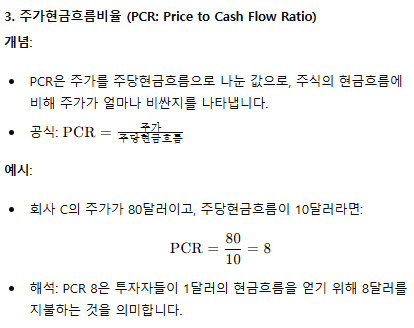

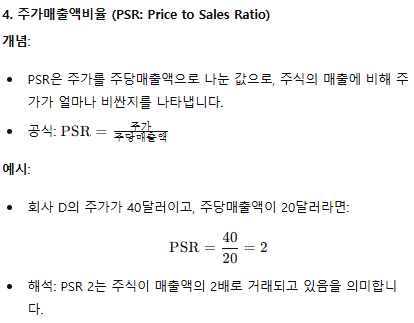 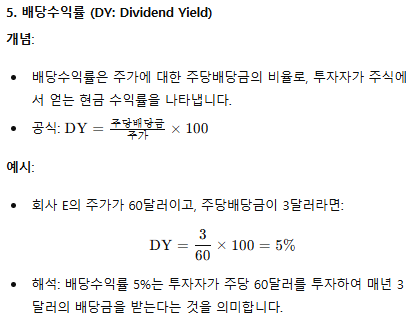

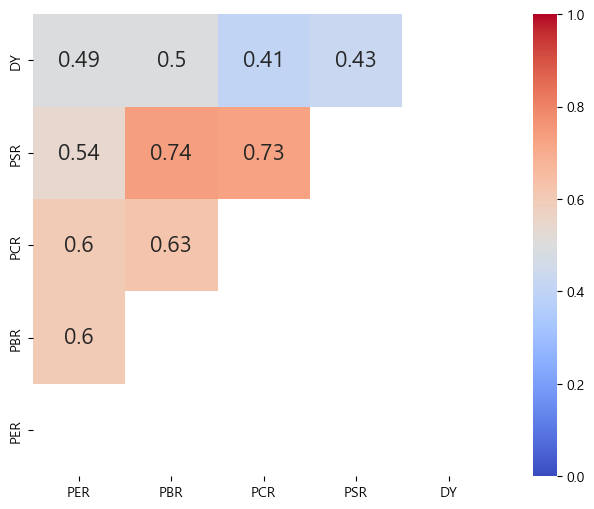

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

value_list_copy = data_bind.copy()
value_list_copy['DY'] = 1 / value_list_copy['DY']
value_list_copy = value_list_copy[['PER', 'PBR', 'PCR', 'PSR', "DY"]]
# 각 지표에 대해 순위
value_rank_all = value_list_copy.rank(axis=0)

# value_rank_all의 상관 행렬을 계산하고, 상삼각 행렬 부분만 남기는 마스크를 생성. 이는 상관 행렬의 중복된 부분을 가리기 위해 사용
mask = np.triu(value_rank_all.corr())
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(value_rank_all.corr(),
            annot=True,
            mask=mask,
            annot_kws={"size": 16},
            vmin=0,
            vmax=1,
            center=0.5,
            cmap='coolwarm',
            square=True)
ax.invert_yaxis()
plt.show()

→ 해석: 비슷한 가치지표임에도 불구하고 서로 간의 상관관계가 꽤 낮은 지표도 있다.

지표를 통합적으로 고려하면 분산효과를 기대

In [34]:
# 위에서 구한 다섯개 지표들의 순위를 더한 후 다시 순위를 매긴다
value_sum_all = value_rank_all.sum(axis=1, skipna=False).rank()
data_bind.loc[value_sum_all <= 20]

,종목코드,종목명,DY,PBR,PCR,PER,PSR
3,000070,삼양홀딩스,0.0518,0.2171,1.8926,2.5504,0.1803
53,000880,한화,0.0272,0.0604,0.5444,1.2626,0.0389
76,001230,동국홀딩스,0.0704,0.1510,0.5882,1.1699,0.1472
85,001390,KG케미칼,0.0211,0.1114,1.3800,1.1132,0.0437
188,003300,한일홀딩스,0.0622,0.1862,1.4599,2.1980,0.1678
303,005720,넥센,0.0298,0.1022,0.7305,2.2350,0.0740
323,005990,매일홀딩스,0.0246,0.1577,0.5925,1.2893,0.0519
329,006120,SK디스커버리,0.0379,0.1389,1.4028,3.4015,0.0943
392,008060,대덕,0.0635,0.1439,0.8432,5.9308,0.1669
466,010770,평화홀딩스,0.0498,0.3393,1.1604,4.0455,0.0553


→ 해석: 단순 저PER, 저PBR 포트폴리오와 달리 지주회사가 아닌 종목들도 포함

## 13.4 모멘텀 전략

### ● 투자에서의 모멘텀 (Momentum)
모멘텀은 주가 또는 이익의 추세를 의미
- 상승 추세의 주식: 지속적으로 상승
- 하락 추세의 주식: 지속적으로 하락

#### 모멘텀의 종류
1. 이익 모멘텀: 기업 이익의 추세
2. 가격 모멘텀: 주가의 추세

#### 일반적인 모멘텀
- 보통 3~12개월 가격 모멘텀을 지칭
- 과거 12개월 수익률이 높은 종목이 계속 상승하는 현상

### ※ note: 계산 기간에 따른 가격 모멘텀의 종류
가격 모멘텀은 계산 기간에 따라 다음과 같이 분류

#### 1. 단기 모멘텀
- 기간: 최근 1주 또는 1개월
- 특징: 수익률 반전 현상
  - 높은 수익률 → 차월 낮은 수익률
  - 낮은 수익률 → 차월 높은 수익률

#### 2. 중기 모멘텀
- 기간: 최근 3~12개월
- 특징: 수익률 지속 현상
  - 높은 수익률 → 향후 지속적 상승

#### 3. 장기 모멘텀
- 기간: 최근 3~5년
- 특징: 수익률 반전 현상
  - 낮은 수익률 종목 → 높은 수익률 종목보다 성과 우수

### ● 모멘텀 효과의 발생 원인

모멘텀 효과는 기업 가치 변화에 대한 사람들의 반응으로 인해 발생

#### ① 기업 가치 변화
- 기업 이익 증가 → 내재가치(펀더멘털 가치) 증가
- 내재가치는 즉각적으로 변화 (그래프의 실선)

#### ② 주가 반응
- 주가는 새로운 정보에 반응하여 상승 (그래프의 점선)
- 초기: 과소 반응으로 상승폭 낮음
- 이후: 지속적 상승

#### ③ 투자자 행동
- 주가 상승 → 투자자들의 주목
- 양떼 효과: 많은 투자자들이 따라서 투자

#### ④ 과잉 반응
- 주가 지속 상승 → 모멘텀 효과 발생

#### ⑤ 반전
- 투자자들이 주가가 기업 가치에 비해 과도하게 높다고 판단
- 주가 하락 시작 → 반전 발생

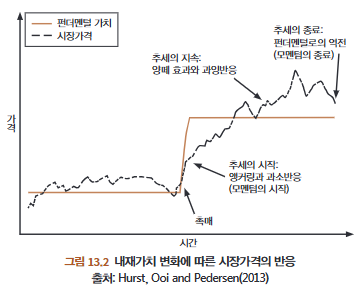

### 13.4.1 모멘텀별 포트폴리오의 수익률

최근 12개월 수익률을 기준으로 구성된 포트폴리오의 수익률을 비교

C:\Users\naare\AppData\Local\Temp\ipykernel_9048\731033236.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_mom = web.DataReader('10_Portfolios_Prior_12_2',
C:\Users\naare\AppData\Local\Temp\ipykernel_9048\731033236.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_mom = web.DataReader('10_Portfolios_Prior_12_2',
C:\Users\naare\AppData\Local\Temp\ipykernel_9048\731033236.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_mom = web.DataReader('10_Portfolios_Prior_12_2',
C:\Users\naare\AppData\Local\Temp\ipykernel_90

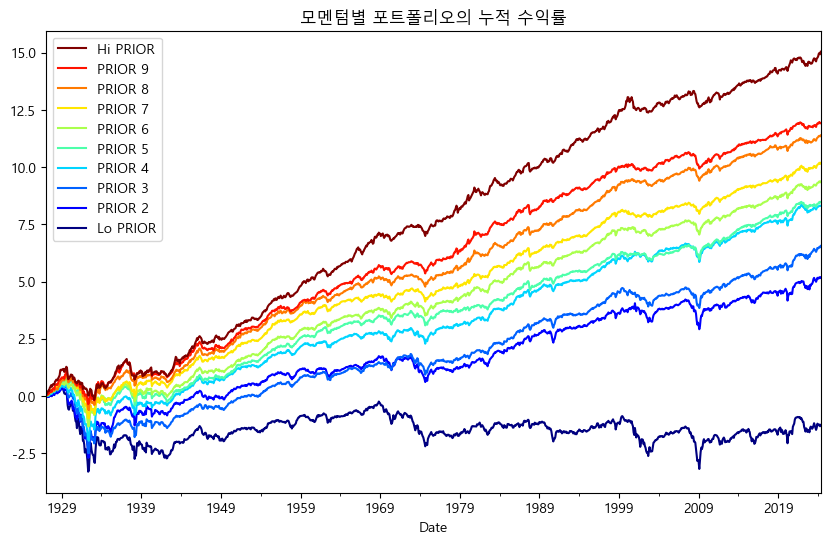

In [35]:
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

df_mom = web.DataReader('10_Portfolios_Prior_12_2',
                        'famafrench',
                        start='1900-01-01')
df_mom_vw = df_mom[0]
df_mom_cum = np.log(1 + df_mom_vw / 100).cumsum()

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

df_mom_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='모멘텀별 포트폴리오의 누적 수익률')
plt.show()

→ 해석:  최근 12개월 수익률이 높을수록(Hi PRIOR) 향후에도 지속적으로 수익률이 높으며, 최근 12월 수익률이 낮을수록(Lo PRIOR) 향후에도 수익률이 낮은 '모멘텀 현상'이 존재

In [36]:
factor_stat(df_mom_vw)

,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
연율화 수익률(산술),4.2000,9.0900,9.5600,10.8600,10.760,11.6100,12.2900,13.4200,14.1800,18.0800
연율화 수익률(기하),-1.3000,5.4600,6.9600,8.9100,9.090,10.0900,11.0200,12.4000,13.0200,16.7000
연율화 변동성,34.1300,28.0900,24.1100,21.8400,20.420,19.9400,18.8900,18.3000,19.3000,22.3400
샤프지수,0.1231,0.3238,0.3965,0.4973,0.527,0.5822,0.6503,0.7331,0.7347,0.8092


### 13.4.2 모멘텀 포트폴리오 구하기

국내 종목 중 모멤텀 주식 확인하기

In [41]:
price_list_org = price_list.copy()
price_list = price_list[['날짜', '종가', '종목코드']]
price_list.head()

,날짜,종가,종목코드
0,2014-05-12,5940.0,000020
1,2014-05-12,19389.0,000040
2,2014-05-12,13300.0,000050
3,2014-05-12,68900.0,000070
4,2014-05-12,23250.0,000080


In [45]:
# 최근 1년치 가격 정보 불러오기
price_list['날짜'] = pd.to_datetime(price_list['날짜'])
max_date = price_list['날짜'].max()
one_year_ago = max_date - pd.DateOffset(years=1)
recent_price_list = price_list[price_list['날짜'] >= one_year_ago]
recent_price_list.reset_index(drop=True, inplace=True)
print(recent_price_list)

               날짜       종가    종목코드
0      2023-05-10   8600.0  000020
1      2023-05-10   1898.0  000040
2      2023-05-10  10550.0  000050
3      2023-05-10  73200.0  000070
4      2023-05-10  23400.0  000080
...           ...      ...     ...
585569 2024-05-10  13240.0  461030
585570 2024-05-10  22550.0  462520
585571 2024-05-10   8860.0  465770
585572 2024-05-10   6310.0  472850
585573 2024-05-10  17160.0  475150

[585574 rows x 3 columns]


In [46]:
price_pivot = price_list.pivot(index='날짜', columns='종목코드', values='종가')
price_pivot.iloc[0:5, 0:5]

종목코드,000020,000040,000050,000070,000080
날짜,,,,,
2014-05-12,5940.0,19389.0,13300.0,68900.0,23250.0
2014-05-13,5890.0,18850.0,13250.0,69300.0,23350.0
2014-05-14,5970.0,19565.0,13150.0,69800.0,23850.0
2014-05-15,5980.0,19026.0,13200.0,70400.0,23850.0
2014-05-16,6060.0,19389.0,13150.0,69500.0,22900.0


In [47]:
# 가격 테이블(price_pivot)에서 가장 끝 행(price_pivot.iloc[-1])을 가장 첫 행(price_pivot.iloc[0])으로 나누어 각 종목의 12개월 수익률 계산
ret_list = pd.DataFrame(data=(price_pivot.iloc[-1] / price_pivot.iloc[0]) - 1, columns=['return'])
data_bind = ticker_list[['종목코드', '종목명']].merge(ret_list, how='left', on='종목코드')

data_bind.head()

,종목코드,종목명,return
0,000020,동화약품,0.454545
1,000040,KR모터스,-0.945897
2,000050,경방,-0.421053
3,000070,삼양홀딩스,-0.015965
4,000075,삼양홀딩스우,NaN


12개월 수익률이 가장 높은 종목

In [56]:
# rank() 함수를 통해 12개월 수익률 열의 순위를 구하며, 모멘텀의 경우 지표가 높을수록 좋으므로 ascending = False 인자를 통해 내림차순으로 순위 나열
momentum_rank = data_bind['return'].rank(axis=0, ascending=False)
# 'momentum_rank <= 20' 즉 모멘텀이 높은 20 종목을 선택
data_bind[momentum_rank <= 20]

,종목코드,종목명,return
23,000250,삼천당제약,16.608025
103,001570,금양,84.108225
152,002710,TCC스틸,14.295515
214,003670,포스코퓨처엠,18.620873
276,005070,코스모신소재,30.974153
328,006110,삼아알미늄,24.766667
727,028300,HLB,52.241961
777,033100,제룡전기,23.573491
830,035900,JYP Ent.,12.100189
894,039200,오스코텍,14.301268


In [54]:
momentum_rank.head()

0    1038.0
1      25.0
2     394.0
3     747.0
4       NaN
Name: return, dtype: float64

해당 종목들의 가격 그래프를 확인

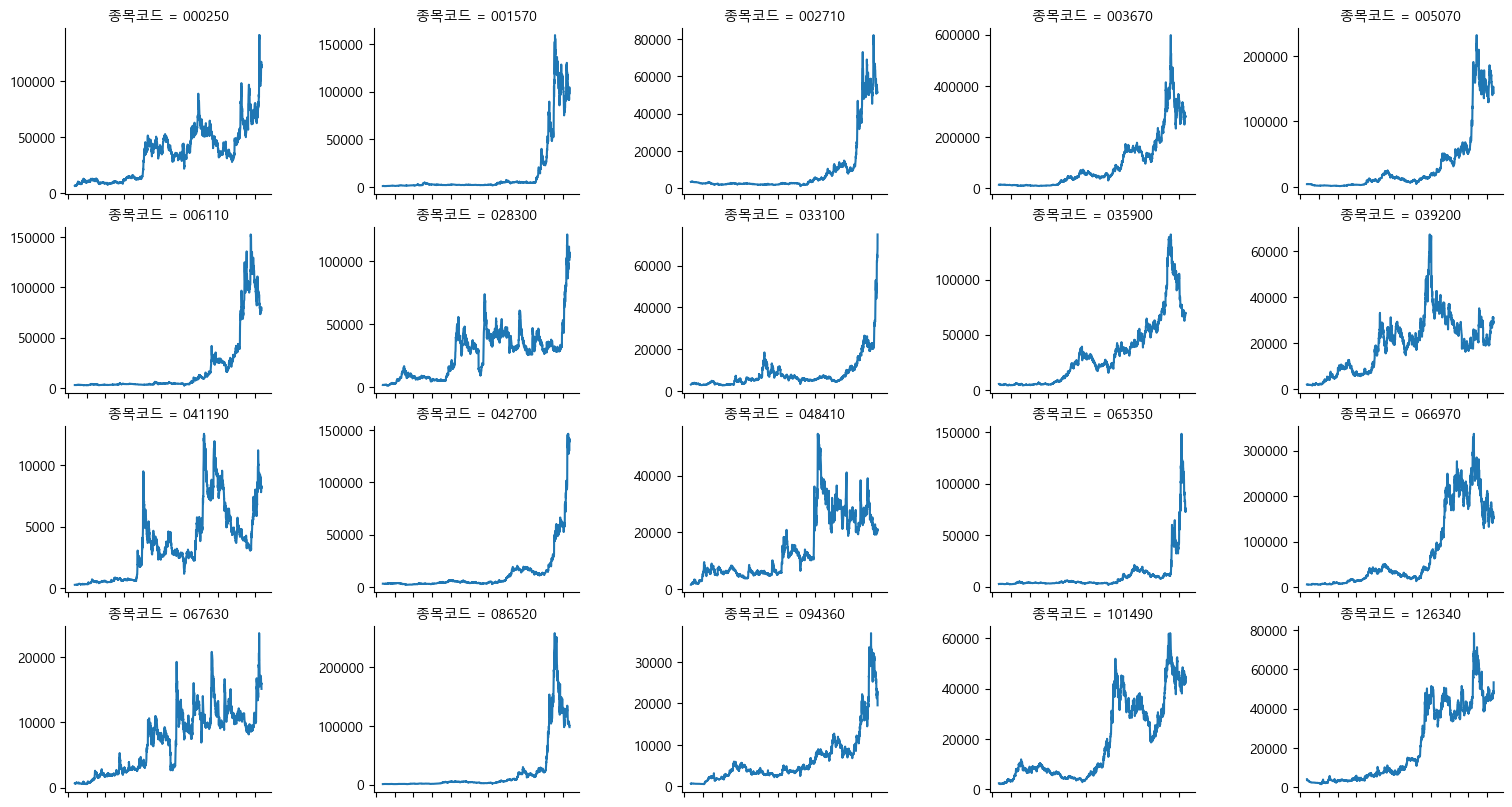

In [57]:
price_momentum = price_list[price_list['종목코드'].isin(
    data_bind.loc[momentum_rank <= 20, '종목코드'])]

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
g = sns.relplot(data=price_momentum,
                x='날짜',
                y='종가',
                col='종목코드',
                col_wrap=5,
                kind='line',
                facet_kws={
                    'sharey': False,
                    'sharex': True
                })
g.set(xticklabels=[])
g.set(xlabel=None)
g.set(ylabel=None)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.show()

In [58]:
data_bind[momentum_rank <= 1]

,종목코드,종목명,return
1384,086520,에코프로,105.277056


### 13.4.3 K-Ratio

### 12개월 수익률 기준 모멘텀 종목들의 주가 그래프 분석

#### 문제점
단순히 수익률 만으로 종목을 선택할 경우 다음과 같은 종목이 포함될 수 있음
1. 장기간 수익률이 횡보하다가 최근 주가가 급등하여 누적수익률이 높게 나타나는 종목
2. 이미 몇 달 전에 주가가 급등한 후 최근에는 하락세이지만, 누적수익률 자체는 높게 나타나는 종목

#### 좋은 모멘텀 주식의 특성
좋은 모멘텀 주식이란 단순히 많이 상승한 것이 아닌, 꾸준하게 상승하는 종목임

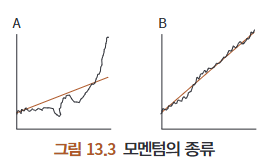

### 동일한 누적수익률을 가진 두 종목 비교

#### 가정
- 두 종목 A와 B가 동일한 누적수익률을 가졌다.
  - A: 상승폭이 작다가 최근 급등하여 누적수익률이 높아진 경우
  - B: 꾸준하게 상승하여 누적수익률이 높아진 경우

#### 분석
- 꾸준하게 상승한 B가 더 뛰어난 모멘텀 주식이라고 볼 수 있다.

#### 모멘텀 주식 평가 방법
- 꾸준한 상승을 측정하기 위해 실무에서는 단순 12개월 수익률이 아닌 3~12개월 수익률을 같이 보거나, 변동성을 함께 고려한다.

#### K-Ratio
- 모멘텀의 꾸준함을 측정하는 지표 중 하나가 'K-Ratio'다.

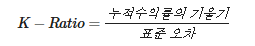

→ 누적수익률이 높을수록 기울기도 커져 분자는 커지고 추세가 꾸준할수록 표준 오차가 작아 분모는 작아짐

In [60]:
import statsmodels.api as sm
import numpy as np

# pct_change() 함수를 통해 각 종목의 수익률을 계산하며, 수익률이 계산되지 않는 첫번째 행은 제외
ret = price_pivot.pct_change().iloc[1:]
# 수익률에 1을 더한 후 로그를 취하고, 해당값의 누적합을 구한다. 결과적으로 로그 누적수익률을 계산
ret_cum = np.log(1 + ret).cumsum()

# x축에는 기간에 해당하는 값을, y축에는 첫번째 종목의 로그 누적수익률에 해당하는 값을 입력
x = np.array(range(len(ret)))
y = ret_cum.iloc[:, 0].values

C:\Users\naare\AppData\Local\Temp\ipykernel_9048\2926520679.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ret = price_pivot.pct_change().iloc[1:]


※ pct_change 함수는 pandas 라이브러리에서 제공하는 메서드로, 시간 시계열 데이터의 퍼센트 변화율(즉, 전 기간 대비 변화율)을 계산하는 데 사용,</br>
&nbsp;&nbsp;&nbsp;&nbsp;   이 함수는 주로 금융 데이터 분석에서 자주 사용되며, 주가의 일일, 월간, 연간 변화율 등을 계산할 때 유용

In [61]:
reg = sm.OLS(y, x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              7762.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        18:25:25   Log-Likelihood:                         -453.82
No. Observations:                2459   AIC:                                      909.6
Df Residuals:                    2458   BIC:                                      915.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0004   4.14e-06     88.105      0.000       0.000       0.000
==============================================================================
Omnibus:                       10.765   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.761
Skew:                           0.160   Prob(JB):                      0.00461
Kurtosis:                       3.055   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
print(reg.params, reg.bse, (reg.params / reg.bse))

[0.00036438] [4.13578083e-06] [88.10468373]


reg.params과 reg.bse를 통해 기울기와 표준오차를 추출할 수 있으며, 이 두개를 나눈 값이 K-Ratio

In [63]:
x = np.array(range(len(ret)))
k_ratio = {}

# for문을 통해 모든 종목에 대한 K-Ratio 계산
for i in range(0, len(ticker_list)):

    ticker = data_bind.loc[i, '종목코드']
    
    # 해당 종목이 상장한지 1년이 되지 않아 K-Ratio를 구할 수 없을 경우 try except문을 통해 nan을 저장
    try:
        y = ret_cum.loc[:, price_pivot.columns == ticker]
        reg = sm.OLS(y, x).fit()
        res = float(reg.params / reg.bse)
    except:
        res = np.nan

    k_ratio[ticker] = res

k_ratio_bind = pd.DataFrame.from_dict(k_ratio, orient='index').reset_index()
k_ratio_bind.columns = ['종목코드', 'K_ratio']

k_ratio_bind.head()

C:\Users\naare\AppData\Local\Temp\ipykernel_9048\3328310397.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  res = float(reg.params / reg.bse)


,종목코드,K_ratio
0,000020,88.104684
1,000040,-234.960196
2,000050,-19.957760
3,000070,19.085272
4,000075,NaN


K-Ratio가 높은 종목 확인

In [64]:
data_bind = data_bind.merge(k_ratio_bind, how='left', on='종목코드')
k_ratio_rank = data_bind['K_ratio'].rank(axis=0, ascending=False)
data_bind[k_ratio_rank <= 20]

,종목코드,종목명,return,K_ratio
23,000250,삼천당제약,16.608025,211.133479
60,000990,DB하이텍,5.798107,195.796828
283,005290,동진쎄미켐,11.456609,265.946508
548,014680,한솔케미칼,5.279461,204.784178
813,034950,한국기업평가,1.322931,207.397860
830,035900,JYP Ent.,12.100189,212.011499
917,041190,우리기술투자,29.555556,200.063868
994,048410,현대바이오,12.375796,190.349760
1013,049720,고려신용정보,10.154639,225.386524
1072,053610,프로텍,3.936003,217.884679


→ 단순 모멘텀(12개월 수익률)과 동일하게 K-Ratio도 높을수록 좋으므로 내림차순 기준으로 순위

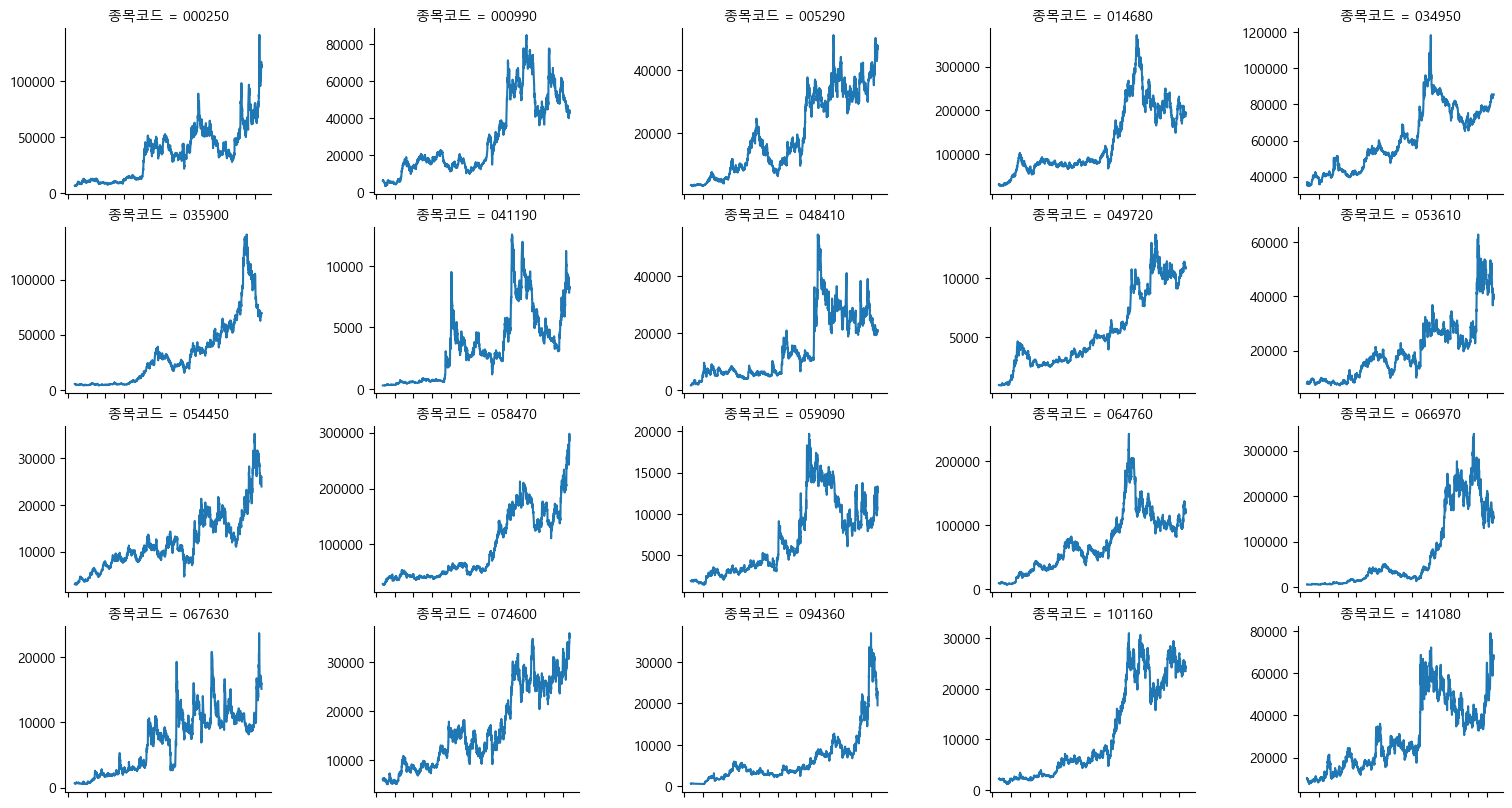

In [65]:
k_ratio_momentum = price_list[price_list['종목코드'].isin(
    data_bind.loc[k_ratio_rank <= 20, '종목코드'])]

plt.rc('font', family='Malgun Gothic')
g = sns.relplot(data=k_ratio_momentum,
                x='날짜',
                y='종가',
                col='종목코드',
                col_wrap=5,
                kind='line',
                facet_kws={
                    'sharey': False,
                    'sharex': True
                })
g.set(xticklabels=[])
g.set(xlabel=None)
g.set(ylabel=None)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.show()

→ 기존 단순 모멘텀이 비해 훨씬 더 꾸준하게 우상향하는 종목들이 선택되는 것을 확인할 수 있음

## 13.5 퀄리티 전략

### 기업의 우량성(퀄리티) 평가 지표

#### ● 벤자민 그레이엄과 워런 버핏의 투자 철학
- 벤자민 그레이엄: 유동 자산이 풍부하고 재무적으로 건전하며, 꾸준하게 이익을 달성하는 기업 강조.
- 워런 버핏: **실적의 강력한 성장 추세**와 **높은 자기자본 이익률(ROE)**을 기준으로 종목 선정.

#### ● 기업의 우량성 평가
- **주관적이고 광범위**: 한 마디로 정의하기 어려움.
- 연구에 따르면, **수익성**, **성장성**, **안정성**이 높은 주식일수록 수익률이 높음.

#### ● 우량성 관련 지표
① **수익성**: 기업이 돈을 얼마나 잘 버는가 (ROE, ROA, 매출총이익률 등).</br>
② **수익의 안정성**: 기업이 얼마나 안정적으로 돈을 버는가 (ROE의 변동성 등).</br>
③ **재무 구조**: 기업의 재무 구조가 얼마나 안전한가 (차입비율 등).</br>
④ **이익의 성장**: 기업의 이익 증가율이 얼마나 되는가 (전년 대비 ROE 증가율 등).</br>
⑤ **재무 신뢰도**: 재무제표를 얼마나 신뢰할 수 있는가 (회계 처리 방법 등).</br>
⑥ **배당**: 얼마나 주주 친화적인가 (배당금, 신주발행, 자사주 매입 등).</br>
⑦ **투자**: 얼마나 신사업에 투자를 하는가 (총자산의 증가 등).</br>

#### ● 가장 중요한 지표: 수익성
- **기업의 지속 가능성**: 돈을 벌지 못하는 기업은 지속될 수 없음.
- **표준화 필요**: 기업의 규모에 비해 얼마를 버는지 비교해야 함 (수익의 양이 아닌, 수익성 지표).

#### ● 널리 사용되는 수익성 지표
| 지표 | 설명 | 분자 | 분모 |
| --- | --- | --- | --- |
| ROE(Return on Equity)	| 자기자본이익율 | 당기순이익 | 자본 |
| ROA(Return on Asset)	| 총자산이익률 | 당기순이익 | 자산 |
| ROIC(Return on Invested Capital) | 투하자본이익률 | 당기순이익 | 투하자본 |
| GP(Gross Profitability) | 매출총이익률 | 매출총이익 | 자산 혹은 자본 |

### 우량주 효과 발생 이유

#### 사람들의 반응과 우량주 효과
- **높은 수익성에 대한 반응**:
  - 투자자들의 기대: 높은 수익성이 다시 원래 수준으로 빠르게 돌아갈 것이라고 생각함.
  - 실제 경향: 수익성이 높은 기업은 계속해서 높은 수익성을 보이는 경향이 있음.

- **낮은 수익성에 대한 반응**:
  - 투자자들의 기대: 낮은 수익성이 반등할 것이라고 생각함.
  - 실제 경향: 수익성이 낮은 기업은 계속해서 낮은 수익성을 보이는 경향이 있음.

#### 요약
- **우량주 효과**는 기업의 수익성에 대한 투자자들의 반응과 실제 수익성 지속 경향 간의 차이에서 발생함.
- 높은 수익성을 유지하는 기업은 계속해서 좋은 성과를 내고, 낮은 수익성을 유지하는 기업은 계속해서 부진한 성과를 나타냄.


### 13.5.1 수익성별 포트폴리오의 수익률

영업수익성을 기준으로 구성된 포트폴리오의 수익률을 비교,  'Portfolios_Formed_on_OP'

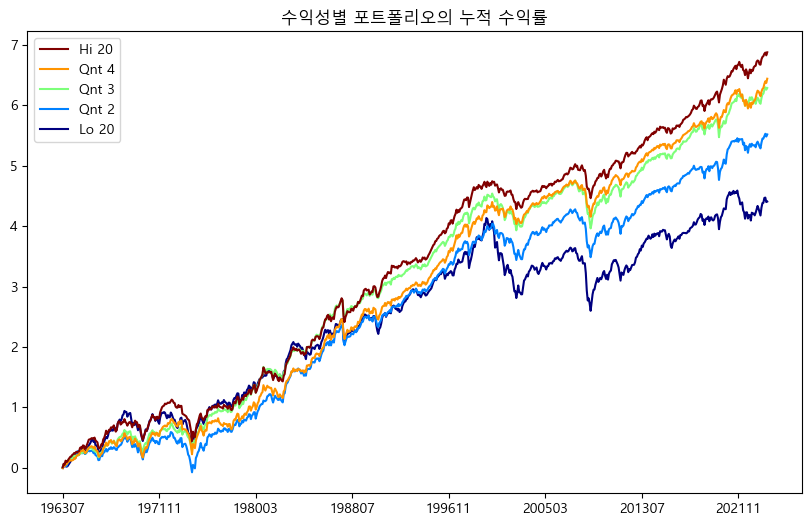

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Portfolios_Formed_on_OP_CSV.zip'
# read_csv() 함수 내에 zip 파일 링크를 입력하면, 압축 파일 내의 CSV 파일을 불러올 수 있음
# 상위 행 24개는 데이터에 대한 설명, skiprows 인자를 통해 무시
# 인코딩은 cp1252로, 인덱스는 첫번째 열로 설정
df_op = pd.read_csv(url, skiprows=24, encoding='cp1252', index_col=0)
# 파일 내에는 월별 수익률, 연간 수익률, 포트폴리오 내 종목수 등 수많은 테이블이 포함
# 시가총액가중방식 포트폴리오에 해당하는 부분만 찾기 위해 isna() 함수를 통해 처음으로 na가 나타나는 지점(end_point)을 찾음
end_point = np.where(pd.isna(df_op.iloc[:, 2]))[0][0]
# 시가총액가중방식 수익률에 해당하는 부분만 선택하며, 20%씩 나눈 열을 선택, apply(pd.to_numeric) 를 통해 모든 열을 숫자 형태로 변경
df_op_vw = df_op.iloc[0:end_point][[
    'Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20'
]].apply(pd.to_numeric)
# 로그 누적수익률을 계산
df_op_cum = np.log(1 + df_op_vw / 100).cumsum()

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

df_op_cum.plot(figsize=(10, 6),
               colormap=cm.jet,
               legend='reverse',
               title='수익성별 포트폴리오의 누적 수익률')
plt.show()

→ 해석: 수익성이 높을수록(Hi 20) 향후에도 지속적으로 수익률이 높으며, 수익성이 낮을수록(Lo 20) 향후에도 수익률이 낮은 '퀄리티 현상'이 존재

포트폴리오 별 통계값을 확인

In [67]:
factor_stat(df_op_vw)

,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20
연율화 수익률(산술),9.2200,10.4000,11.5800,11.8200,12.5700
연율화 수익률(기하),7.5000,9.4800,10.8700,11.1600,11.9600
연율화 변동성,19.6400,16.0800,15.4900,15.4600,15.5600
샤프지수,0.4697,0.6467,0.7472,0.7647,0.8075


→ 해석: 수익성이 높을수록 수익률이 높고 변동성이 낮음을 확인

### 13.5.2 우량성 포트폴리오 구하기

내 종목들 중 우량성(수익성)이 높은 종믁은 어떠한 것이 있는지 확인

In [73]:
fs_list.head(10)
fs_list_org = fs_list.copy()

수익성 계산을 위한 필요 계정: 당기순이익, 매출총이익, 영업활동으로인한현금흐름, 자산, 자본 / 분기 데이터

In [74]:
fs_list = fs_list[
    (fs_list['계정'].isin(['당기순이익', '매출총이익', '영업활동으로인한현금흐름', '자산', '자본'])) &
    (fs_list['공시구분'] == 'q')
]

print(fs_list)

                   계정         기준일       값    종목코드 공시구분     ttm
642554          당기순이익  2023-03-31   129.0  000020    q   828.0
644881          당기순이익  2023-06-30    76.0  000020    q   617.0
647229          당기순이익  2023-09-30    62.0  000020    q   483.0
649609          당기순이익  2023-12-31    16.0  000020    q   283.0
762310          매출총이익  2023-03-31   526.0  000020    q  5216.0
...               ...         ...     ...     ...  ...     ...
654301          당기순이익  2023-12-31     2.0  472850    q     NaN
773673          매출총이익  2023-12-31    21.0  472850    q     NaN
1152261  영업활동으로인한현금흐름  2023-12-31     1.0  472850    q     NaN
1541705            자본  2023-12-31  1872.0  472850    q     NaN
1600500            자산  2023-12-31  3387.0  472850    q     NaN

[46615 rows x 6 columns]


In [76]:
# sort_values() 메서드를 통해 정렬
fs_list = fs_list.sort_values(['종목코드', '계정', '기준일'])
# '종목코드'와 '계정' 별로 그룹을 묶은 후 TTM 값을 구하기 위해 rolling() 메서드를 통해 4분기 합을 계산, min_periods=4를 통해 4분기 데이터가 없는 경우는 계산X
fs_list['ttm'] = fs_list.groupby(['종목코드', '계정'], as_index=False)['값'].rolling(window=4, min_periods=4).sum()['값']
fs_list_clean = fs_list.copy()
# 자산과 자본의 경우 재무상태표 항목이므로 합이 아닌 평균을 구하며, 나머지 항목은 합을 그대로 사용
fs_list_clean['ttm'] = np.where(fs_list_clean['계정'].isin(['자산', '자본']), fs_list_clean['ttm'] / 4, fs_list_clean['ttm'])
# tail(1)을 통해 종목코드와 계정 별 최근 데이터만 선택
fs_list_clean = fs_list_clean.groupby(['종목코드', '계정']).tail(1)

# pivot() 함수를 통해 가로로 긴 형태로 변경
fs_list_pivot = fs_list_clean.pivot(index='종목코드', columns='계정', values='ttm')
# 수익성 지표에 해당하는 ROE, GPA, CFO를 각각 계산
fs_list_pivot['ROE'] = fs_list_pivot['당기순이익'] / fs_list_pivot['자본']
fs_list_pivot['GPA'] = fs_list_pivot['매출총이익'] / fs_list_pivot['자산']
fs_list_pivot['CFO'] = fs_list_pivot['영업활동으로인한현금흐름'] / fs_list_pivot['자산']

quality_list = ticker_list[['종목코드', '종목명']].merge(fs_list_pivot, how='left', on='종목코드')
quality_list.round(4).head()

,종목코드,종목명,당기순이익,매출총이익,영업활동으로인한현금흐름,자본,자산,ROE,GPA,CFO
0,000020,동화약품,283.0,1904.0,293.0,3973.50,5035.00,0.0712,0.3782,0.0582
1,000040,KR모터스,-211.0,48.0,-87.0,260.25,1486.75,-0.8108,0.0323,-0.0585
2,000050,경방,-135.0,1118.0,461.0,7428.50,12227.25,-0.0182,0.0914,0.0377
3,000070,삼양홀딩스,2270.0,5287.0,3059.0,26671.00,47636.25,0.0851,0.1110,0.0642
4,000075,삼양홀딩스우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


수익성 지표 순위: 수익성 지표의 경우 값이 높을수록 좋으므로 ascending = False를 통해 내림차순 기준 순위 구함

In [77]:
quality_list_copy = quality_list[['ROE', 'GPA', 'CFO']].copy()
quality_rank = quality_list_copy.rank(ascending=False, axis=0)

지표별 상관관계

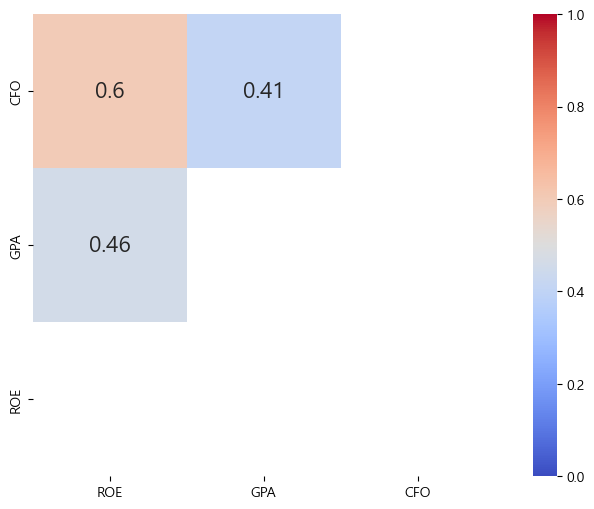

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

mask = np.triu(quality_rank.corr())
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(quality_rank.corr(),
            annot=True,
            mask=mask,
            annot_kws={"size": 16},
            vmin=0,
            vmax=1,
            center=0.5,
            cmap='coolwarm',
            square=True)
ax.invert_yaxis()
plt.show()

→ 해석: 비슷한 수익성 지표임에도 불구하고 서로 간의 상관관계가 꽤 낮음. 따라서 지표를 통합적으로 고려하면 분산효과를 기대할 수 있음.

수익성이 높은 종목을 선택

In [79]:
# 위에서 구한 세개 지표들의 순위를 더한 후 다시 순위를 매김
quality_sum = quality_rank.sum(axis=1, skipna=False).rank()
# 최종 순위가 낮은 20 종목을 선택, 하나의 지표보다 세개 지표가 골고루 낮은 종목을 선택
quality_list.loc[quality_sum <= 20, ['종목코드', '종목명', 'ROE', 'GPA', 'CFO']].round(4)

,종목코드,종목명,ROE,GPA,CFO
169,002960,한국쉘석유,0.3278,0.5724,0.2476
777,033100,제룡전기,0.5651,0.6972,0.3020
830,035900,JYP Ent.,0.2823,0.5296,0.2986
840,036220,오상헬스케어,0.3914,0.6240,0.4307
849,036620,감성코퍼레이션,0.3789,1.2184,0.2693
893,039130,하나투어,0.4357,0.7210,0.2044
1013,049720,고려신용정보,0.2791,1.7962,0.2271
1118,058630,엠게임,0.2059,0.5900,0.2169
1212,067160,SOOP,0.2721,0.6588,0.2268
1445,092130,이크레더블,0.2896,0.7399,0.2160


## 13.6 마법 공식

### 멀티팩터 투자 전략

#### 멀티팩터 투자
- 하나의 팩터만을 보고 투자하는 것보다, 둘 혹은 그 이상의 팩터를 결합해 투자하는 것이 훨씬 좋은 포트폴리오를 구성할 수 있음.
- 이러한 방법을 **멀티팩터**라고 함.

#### 밸류와 퀄리티의 조합
- 밸류와 퀄리티의 조합은 전통적으로 많이 사용된 방법.
- 대표적인 예가 **조엘 그린블라트**의 '마법공식'임.

#### 퀄리티와 밸류 간의 관계
- 퀄리티와 밸류 간의 관계를 이해하는 것이 중요함.
- 퀄리티: 기업의 재무적 건전성, 수익성, 성장성 등을 나타냄.
- 밸류: 기업의 가치, 저평가된 정도 등을 나타냄.

#### 마법공식의 정의와 구성 방법
- **마법공식**은 조엘 그린블라트가 제안한 투자 전략.
- 마법공식은 높은 퀄리티와 저평가된 밸류를 가진 종목을 선정하여 투자하는 방법임.
- **구성 방법**:
  1. **퀄리티 지표**: ROIC (투하자본이익률, Return on Invested Capital) 사용.
  2. **밸류 지표**: EV/EBIT (Enterprise Value to Earnings Before Interest and Taxes) 사용.
  3. 모든 종목을 퀄리티와 밸류 지표로 각각 순위화.
  4. 두 순위의 합을 계산하여 최종 순위를 결정.
  5. 최종 순위가 높은 종목에 투자.

#### 요약
- 멀티팩터 투자 전략은 더 나은 포트폴리오를 구성하기 위해 사용됨.
- 밸류와 퀄리티의 조합이 대표적인 멀티팩터 전략 중 하나임.
- 조엘 그린블라트의 '마법공식'은 높은 퀄리티와 저평가된 밸류를 가진 종목을 선정하는 방법으로 정의됨.

### 13.6.1 퀄리티와 밸류 간의 관계

### 퀄리티 팩터와 밸류 팩터의 관계

#### 투자 원칙
- **좋은 기업을 싸게 사는 것**: 투자의 정석 중 하나.
- 이를 팩터의 관점에서 이해하면 **퀄리티 팩터**와 **밸류 팩터**로 설명할 수 있음.

#### 팩터 간의 관계
- **밸류 팩터**와 **퀄리티 팩터**는 반대의 관계에 있음.
  - **가치주**: 위험이 크기 때문에 시장에서 소외되어 저평가됨. 이러한 위험에 대한 대가로 밸류 팩터의 수익률이 높음.
  - **우량주**: 사람들은 우량주에 프리미엄을 지불하려 하므로 퀄리티 팩터의 수익률이 높음.
  - 이는 동전의 양면과 같지만, 장기적으로 가치주와 우량주 모두 우수한 성과를 기록함.

#### 퀄리티 지표와 밸류 지표의 관계 확인
- **퀄리티 지표**: 매출총이익
- **밸류 지표**: PBR (Price to Book Ratio)
- 두 지표를 통해 퀄리티 팩터와 밸류 팩터 간의 관계를 확인해보자.

#### 요약
- 좋은 기업을 싸게 사는 것은 퀄리티 팩터와 밸류 팩터로 설명할 수 있음.
- 밸류 팩터와 퀄리티 팩터는 반대의 관계에 있지만, 장기적으로 모두 우수한 성과를 기록함.
- 매출총이익과 PBR을 통해 둘 사이의 관계를 확인할 수 있음.

In [84]:
# 재무제표 테이블 중 매출총이익, 자산 항목(연간 재무제표 기준)을 
fs_list = fs_list_org[
    (fs_list_org['계정'].isin(['매출총이익', '자산'])) &
    (fs_list_org['공시구분'] == 'y')
]

In [86]:
# 밸류 지표: 밸류 지표가 음수인 경우 nan으로 변환한 후, 피벗
value_list.loc[value_list['값'] < 0, '값'] = np.nan
value_pivot = value_list.pivot(index='종목코드', columns='지표', values='값')


In [87]:
value_pivot.head()

지표,DY,PBR,PCR,PER,PSR
종목코드,,,,,
000020,0.0205,0.6165,8.3604,8.6558,0.6784
000040,NaN,1.1720,NaN,NaN,0.3891
000050,0.0161,0.2860,4.6089,NaN,0.5399
000070,0.0518,0.2171,1.8926,2.5504,0.1803
000080,0.0469,1.2691,8.6440,40.0059,0.5635


In [83]:
# 퀄리티 지표
fs_list = fs_list.sort_values(['종목코드', '계정', '기준일'])
fs_list = fs_list.groupby(['종목코드', '계정']).tail(1)
fs_list_pivot = fs_list.pivot(index='종목코드', columns='계정', values='값')
# 무제표 데이터 중 가장 최근 데이터를 이용해 매출총이익률
fs_list_pivot['GPA'] = fs_list_pivot['매출총이익'] / fs_list_pivot['자산']

# 데이터 합치기
# 두 지표의 순위를 각각 구한 후 merge() 함수를 통해 하나로 합치고 매출총이익률의 경우 내림차순으로 순위
bind_rank = value_pivot['PBR'].rank().to_frame().merge(
    fs_list_pivot['GPA'].rank(ascending=False), how='inner', on='종목코드')

# 상관관계
bind_rank.corr()

,PBR,GPA
PBR,1.000000,-0.093126
GPA,-0.093126,1.000000


→ 해석: PBR과 GPA 간에는 음의 상관관계가 있음이 확인</br>
※ GPA: Gross Profit to Asset ratio, 기업이 보유한 자산을 얼마나 효율적으로 활용하여 수익을 창출하는지를 평가

PBR의 분위수별 GPA 평균값 계산

C:\Users\naare\AppData\Local\Temp\ipykernel_9048\746374983.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bind_group = bind_data.groupby('PBR_quantile').mean('GPA')


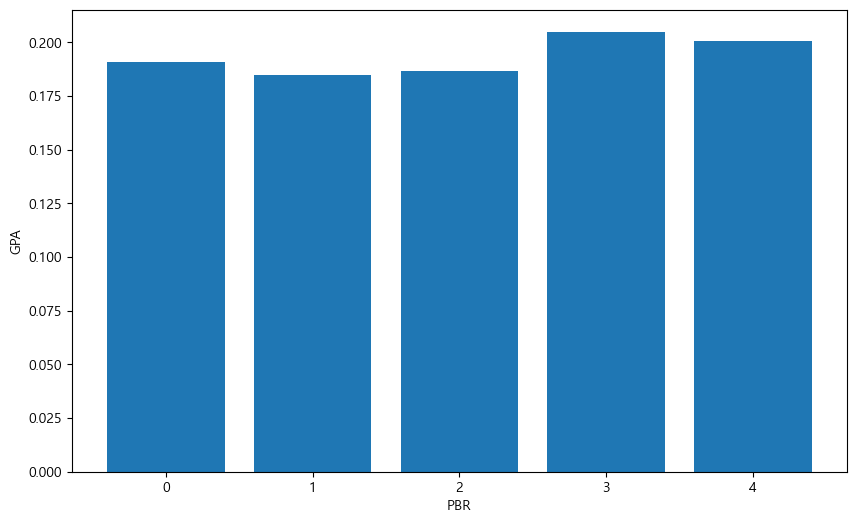

In [88]:
import matplotlib.pyplot as plt

# 밸류와 재무제표 테이블을 하나로 합치기
bind_data = value_list.merge(fs_list_pivot, how='left', on='종목코드')
bind_data = bind_data.dropna()
# qcut() 함수를 이용해 PBR을 5분위수로 나누기
bind_data['PBR_quantile'] = pd.qcut(bind_data['값'], q=5, labels=range(1, 6))
# PBR의 분위수별 그룹을 묶어 준 후, 각 그룹별 GPA의 평균
bind_group = bind_data.groupby('PBR_quantile').mean('GPA')

fig, ax = plt.subplots(figsize=(10, 6))
plt.rc('font', family='Malgun Gothic')
plt.bar(x=np.arange(5), height=bind_group['GPA'])
plt.xlabel('PBR')
plt.ylabel('GPA')

plt.show()

→ 해석: 교재에 의하면 PBR이 낮을수록 GPA도 낮으며, 즉 가치주일수록 우량성은 떨어짐</br>
&nbsp;&nbsp;&nbsp;&nbsp;반면에 PBR이 높을수록 GPA도 높으며, 이는 주식의 가격이 비쌀수록 우량성도 높다

밸류 팩터와 퀄리티 팩터 간의 관계

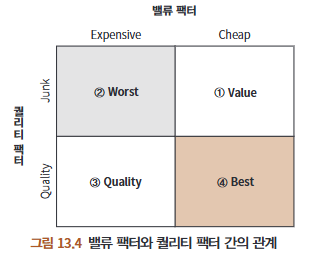

주가가 쌀수록(저밸류) 기업의 우량성은 떨어지며(①번), 반대로 기업의 우량성이 좋으면 주식은 비싼 경향(③번)이 있다.</br>
물론 우량성도 떨어지고 비싸기만한 주식(②번)을 사려는 사람들 아마 없을 것이다. 결과적으로 우리가 원하는 최고의 주식은 우량성이 있으면서도 가격은 싼 주식(④번)이다. 

프렌치 라이브러리의 데이터를 이용해 4개 포트폴리오의 수익률 차이를 확인

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_BEME_OP_5x5_CSV.zip'
df_qv = pd.read_csv(url, skiprows=21, encoding='cp1252', index_col=0)
end_point = np.where(pd.isna(df_qv.iloc[:, 2]))[0][0]
df_qv = df_qv.iloc[0:end_point].apply(pd.to_numeric)

df_qv.head()

,LoBM LoOP,BM1 OP2,BM1 OP3,BM1 OP4,LoBM HiOP,BM2 OP1,BM2 OP2,BM2 OP3,BM2 OP4,BM2 OP5,...,BM4 OP1,BM4 OP2,BM4 OP3,BM4 OP4,BM4 OP5,HiBM LoOP,BM5 OP2,BM5 OP3,BM5 OP4,HiBM HiOP
196307,1.5667,2.3959,0.1563,-1.2642,0.6103,0.9993,1.3035,0.2018,-0.4454,-1.7355,...,-1.7877,-0.4092,-5.2600,1.2625,2.4473,-1.9916,1.4799,2.7043,-1.7646,-1.0694
196308,5.9311,2.5545,6.4142,5.5728,5.8709,1.5049,3.8605,4.5227,5.2703,5.7711,...,7.7888,6.4719,15.5939,4.1357,11.9795,5.6974,5.4168,2.6932,6.3988,3.4264
196309,-5.0591,-4.6972,1.3918,-1.8810,-1.2090,-2.0466,-3.4478,0.5906,-2.4894,-4.7131,...,-1.5697,-0.3780,3.6947,-1.3282,-8.4785,-2.6355,-4.7089,-0.3408,-0.4710,-2.9148
196310,-2.1803,-3.7151,0.8348,3.9738,7.2644,-0.5754,1.9820,2.5652,-0.8234,2.6401,...,2.7924,0.4168,9.8824,6.6686,18.9219,1.2438,2.5739,2.0655,-2.1846,8.5136
196311,-3.1118,0.0362,-0.9976,1.0173,-2.6709,-5.2223,0.4643,2.0600,-0.8061,-1.8956,...,0.3592,-1.7549,-4.4519,0.9625,5.1808,1.0567,-2.4117,-1.5184,-0.4706,-2.8375


In [25]:
df_qv = df_qv.tail(120)

→ 밸류와 퀄리티 기준 각각 5분위로 나누어진 총 25개의 포트폴리오가 존재

여러 포트폴리오의 평균을 통해 최종 포트폴리오를 산출

d:\01_study\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


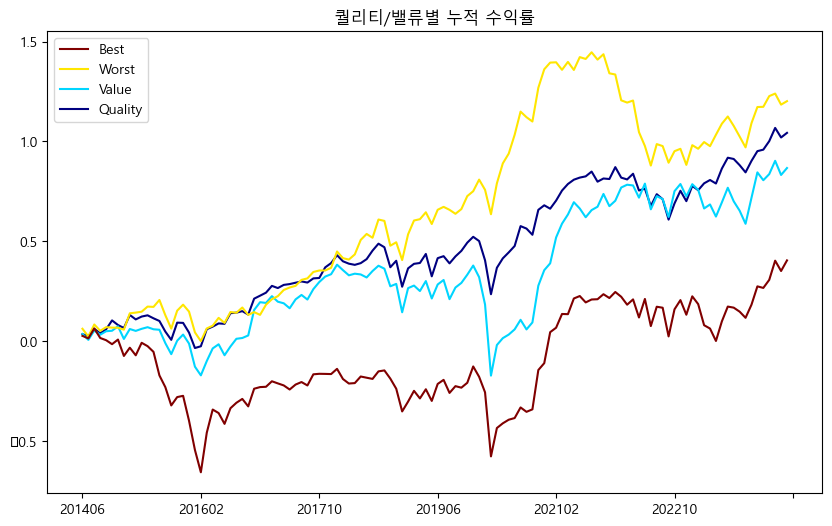

In [26]:
df_qv_quality = df_qv.loc[:, ['LoBM HiOP', 'BM2 OP5', 'BM3 OP5']].mean(axis=1) # Quality
df_qv_value = df_qv.loc[:, ['HiBM LoOP', 'BM5 OP2', 'BM5 OP3']].mean(axis=1) # Value
df_qv_worst = df_qv.loc[:, ['LoBM LoOP', 'BM1 OP2', 'BM2 OP1', 'BM2 OP2']].mean(axis=1) # Worst
df_qv_best = df_qv.loc[:, ['BM5 OP4', 'HiBM HiOP', 'BM4 OP4', 'BM4 OP5']].mean(axis=1) # Best
df_qv_bind = pd.concat([df_qv_quality, df_qv_value, df_qv_worst, df_qv_best], axis=1)
df_qv_bind.columns = ['Quality', 'Value', 'Worst', 'Best']
df_qv_bind_cum = np.log(1 + df_qv_bind / 100).cumsum()

plt.rc('font', family='Malgun Gothic')
df_qv_bind_cum.plot(figsize=(10, 6),
                    colormap=cm.jet,
                    legend='reverse',
                    title='퀄리티/밸류별 누적 수익률')
plt.show()

- Quality: 밸류 기준 하위 1, 2, 3분위에서 수익성 상위 1분위 (높은 퀄리티/높은 밸류에이션)
- Value: 밸류 기준 상위 1분위에서 수익성 하위 1, 2, 3분위 (낮은 밸류에이션/낮은 퀄리티)
- Worst: 밸류 기준 하위 1, 2분위에서 수익성 하위 1, 2분위(높은 밸류에이션/낮은 퀄리티)
- Best: 밸류 기준 상위 1, 2분위에서 수익성 상위 1, 2분위(낮은 밸류에이션/높은 퀄리티)

→ 해석: Worst 포트폴리오의 수익률이 가장 낮다. 밸류와 퀄리티는 비슷하게 좋은 모습을 보이며, 두 가지 팩터를 동시에 고려할 경우 가장 높은 수익률을 보인다.

### 13.6.2 마법 공식 이해하기

### 마법공식 (Magic Formula)

#### 개요
- **조엘 그린블라트**: 고담 캐피탈의 설립자이자 전설적인 투자자.
- **투자 방법**: 《주식 시장을 이기는 작은 책》에서 소개된 방법.
- **핵심 지표**: 두 가지 중요한 지표를 혼합하여 뛰어난 성과를 기록할 수 있다고 주장.

#### 핵심 지표
① **이익 수익률 (Earnings Yield)**
   - **정의**: 기업의 수익을 기업의 가치로 나눈 값.
   - **특징**: PER의 역수와 비슷하며, 밸류 지표 중 하나.
   
② **투하자본 수익률 (Return on Capital)**
   - **정의**: 기업의 수익을 투자한 자본으로 나눈 값.
   - **특징**: ROE와 비슷하며, 퀄리티 지표 중 하나.

#### 마법공식의 구성
- 두 가지 지표의 순위를 각각 구한 후 순위의 합 기준으로 상위 30~50개 종목을 선정.
- 선정된 종목을 1년간 보유한 후 매도하는 전략.

#### 국내 투자자들의 적용 방법
- 데이터 수집의 어려움 때문에, 많은 투자자들이 원래 지표 대신 대체 지표를 사용:
  - **이익 수익률 대신 PER**
  - **투하자본 수익률 대신 ROE**

#### 구현 가능성
- 수집한 데이터를 통해 충분히 원래의 마법공식을 구현할 수 있음.

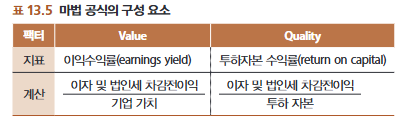

#### 요약
- **마법공식**: 조엘 그린블라트가 소개한 투자 방법으로, 이익 수익률과 투하자본 수익률을 결합하여 우수한 성과를 기록.
- **핵심 지표**: 이익 수익률 (Earnings Yield)과 투하자본 수익률 (Return on Capital).
- **국내 적용**: 대체 지표인 PER와 ROE를 사용하여 적용 가능.
- **구현 가능성**: 충분한 데이터 수집을 통해 원래 마법공식을 구현할 수 있음.

### 13.6.3 마법 공식 포트폴리오

재무제표 항목을 통해 이율과 투하자본 수익률을 계산하고, 이를 통해 마법공식 포트폴리오를 구성

In [117]:
ticker_list.head()

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,8770.0,2.449590e+11,2024-05-08,991.0,13413.0,180.0,보통주
1,000040,KR모터스,KOSPI,1047.0,3.050210e+10,2024-05-08,NaN,618.0,0.0,보통주
2,000050,경방,KOSPI,7750.0,2.124680e+11,2024-05-08,NaN,29623.0,125.0,보통주
3,000070,삼양홀딩스,KOSPI,67600.0,5.789450e+11,2024-05-08,22269.0,257475.0,3500.0,보통주
4,000075,삼양홀딩스우,KOSPI,54800.0,1.666240e+10,2024-05-08,NaN,NaN,3550.0,우선주


In [118]:
ticker_list_org = ticker_list.copy()

In [119]:
max_date = ticker_list_org['기준일'].max()
ticker_list = ticker_list_org[
    (ticker_list_org['기준일'] == max_date) & 
    (ticker_list_org['종목구분'] == '보통주')
]

티커 테이블과 재무제표 테이블 중 마법공식을 계산하는데 필요한 항목을 가져옴

In [120]:
ticker_list.head()

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,8770.0,2.449590e+11,2024-05-08,991.0,13413.0,180.0,보통주
1,000040,KR모터스,KOSPI,1047.0,3.050210e+10,2024-05-08,NaN,618.0,0.0,보통주
2,000050,경방,KOSPI,7750.0,2.124680e+11,2024-05-08,NaN,29623.0,125.0,보통주
3,000070,삼양홀딩스,KOSPI,67600.0,5.789450e+11,2024-05-08,22269.0,257475.0,3500.0,보통주
5,000080,하이트진로,KOSPI,20250.0,1.420210e+12,2024-05-08,512.0,15694.0,950.0,보통주


In [121]:
fs_list = fs_list_org[
    (fs_list_org['계정'].isin(['매출액', '당기순이익', '법인세비용', '이자비용', '현금및현금성자산', '부채', '유동부채', '유동자산', '비유동자산', '감가상각비'])) &
    (fs_list_org['공시구분'] == 'q')
]

In [122]:
fs_list = fs_list.sort_values(['종목코드', '계정', '기준일'])
fs_list['ttm'] = fs_list.groupby(['종목코드', '계정'], as_index=False)['값'].rolling(window=4, min_periods=4).sum()['값']
fs_list_clean = fs_list.copy()
fs_list_clean['ttm'] = np.where(
    fs_list_clean['계정'].isin(['부채', '유동부채', '유동자산', '비유동자산']),
    fs_list_clean['ttm'] / 4, fs_list_clean['ttm'])

fs_list_clean = fs_list_clean.groupby(['종목코드', '계정']).tail(1)
fs_list_pivot = fs_list_clean.pivot(index='종목코드', columns='계정', values='ttm')

data_bind = ticker_list[['종목코드', '종목명', '시가총액']].merge(fs_list_pivot,
                                                       how='left',
                                                       on='종목코드')
data_bind['시가총액'] = data_bind['시가총액'] / 100000000

data_bind.head()

,종목코드,종목명,시가총액,감가상각비,당기순이익,매출액,법인세비용,부채,비유동자산,유동부채,유동자산,이자비용,현금및현금성자산
0,000020,동화약품,2449.590,125.0,283.0,3611.0,87.0,1061.25,2685.75,860.00,2349.25,4.0,3010.0
1,000040,KR모터스,305.021,35.0,-211.0,784.0,NaN,1226.50,926.00,1067.00,561.00,84.0,536.0
2,000050,경방,2124.680,401.0,-135.0,3935.0,110.0,4798.25,10828.00,2420.00,1399.25,122.0,993.0
3,000070,삼양홀딩스,5789.450,NaN,2270.0,32108.0,395.0,20965.00,29605.25,11343.50,18031.00,475.0,8707.0
4,000080,하이트진로,14202.100,1389.0,355.0,25203.0,330.0,22436.25,22898.25,16907.75,10729.50,505.0,11543.0


밸류 지표에 해당하는 이익수익률을 계산: 이자 및 법인세 차감전이익(EBIT)을 기업가치(시가총액 + 순차입금)로 나눈 값

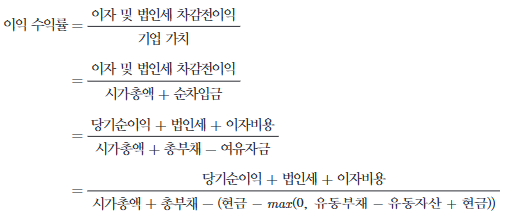

In [123]:
# 분자(EBIT): 이자 및 법인세 차감전 이익은 당기순이익에 법인세비용과 이자비용을 더해 계산
magic_ebit = data_bind['당기순이익'] + data_bind['법인세비용'] + data_bind['이자비용']

# 분모: 시가총액, 총 부채, 여유자금 총 세 가지로 구성되어 있다. 시가총액과 총 부채는 재무제표 데이터를 그대로 사용하며, 여유자금의 경우 세 단계를 통해 계산
magic_cap = data_bind['시가총액']
magic_debt = data_bind['부채']

## 분모: 여유자금
magic_excess_cash = data_bind['유동부채'] - data_bind['유동자산'] + data_bind[
    '현금및현금성자산']
magic_excess_cash[magic_excess_cash < 0] = 0
magic_excess_cash_final = data_bind['현금및현금성자산'] - magic_excess_cash

magic_ev = magic_cap + magic_debt - magic_excess_cash_final

# 이익수익률
magic_ey = magic_ebit / magic_ev

리티 지표에 해당하는 투하자본 수익률을 계산: 이자 및 법인세 차감전이익(EBIT)를 투하자본(IC)으로 나누어 계산

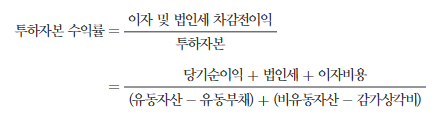

In [124]:
# 투하자본 수익률: 분모에 해당하는 투하자본은 재무제표 항목을 그대로 사용하면 되며, 분자인 이자 및 법인세 차감전이익은 위에서 이미 구해둔 값을 사용
magic_ic = (data_bind['유동자산'] - data_bind['유동부채']) + (data_bind['비유동자산'] - data_bind['감가상각비'])
magic_roc = magic_ebit / magic_ic

마법공식 포트폴리오 구성

In [125]:
# 열 입력하기: 이익 수익률'과 '투하자본 수익률' 열에 위에서 계산한 값을 입력
data_bind['이익 수익률'] = magic_ey
data_bind['투하자본 수익률'] = magic_roc

#두 열의 순위를 각각 구한 후, 이 두 값을 합치고 그 합 기준으로 순위를 구함
magic_rank = (magic_ey.rank(ascending=False, axis=0) + magic_roc.rank(ascending=False, axis=0)).rank(axis=0)
# 최종 순위가 20위 이내인 종목을 선택
data_bind.loc[magic_rank <= 20, ['종목코드', '종목명', '이익 수익률', '투하자본 수익률']].round(4)

,종목코드,종목명,이익 수익률,투하자본 수익률
140,003030,세아제강지주,0.4015,0.2063
166,003560,IHQ,0.2414,0.3595
239,005440,현대지에프홀딩스,0.5063,0.2946
255,005860,한일사료,0.6356,1.1327
372,009970,영원무역홀딩스,58.0495,0.1944
498,016710,대성홀딩스,0.2891,0.2960
735,035610,솔본,0.4838,0.2477
751,036220,오상헬스케어,1.5342,0.5217
852,042940,상지건설,0.3757,0.5205
889,046310,백금T&A,0.4018,0.2065


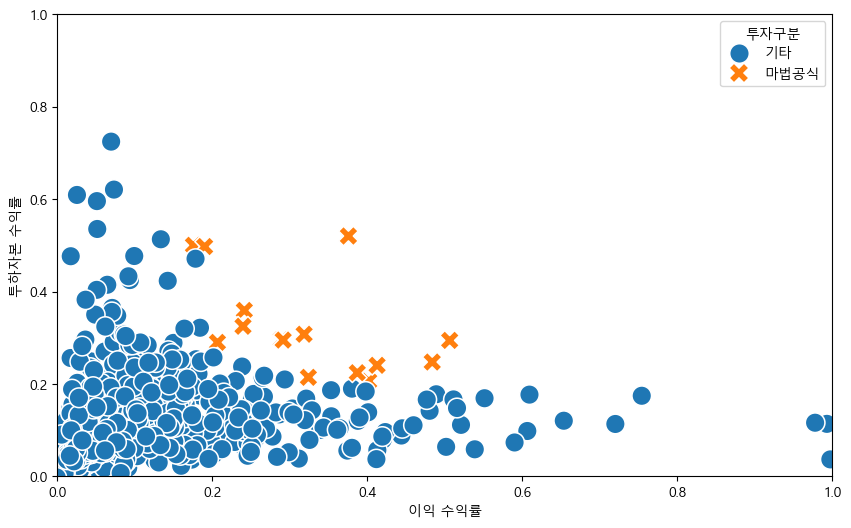

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

data_bind['투자구분'] = np.where(magic_rank <= 20, '마법공식', '기타')

plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=data_bind,
                x='이익 수익률',
                y='투하자본 수익률',
                hue='투자구분',
                style='투자구분',
                s=200)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

→ 해석: 전체 종목 중 마법공식에 해당하는 종목들이 우측 상단, 즉 이익 수익률이 높고 투하자본 수익률도 높은 지점에 위치

## 13.7 섹터 중립 포트폴리오

### 팩터 전략의 단점: 섹터 쏠림
- 팩터 전략의 주요 단점 중 하나는 선택된 종목들이 특정 섹터로 쏠리는 경향이 있다는 점이다.

#### 모멘텀 전략의 쏠림 현상
- **모멘텀 전략**: 과거 수익률을 토대로 종목을 선정하는 전략.
- 특정 섹터의 호황기에 동일한 섹터의 모든 종목이 함께 움직이는 경향이 있어 쏠림 현상이 심해질 수 있다.

### 요약
- 팩터 전략을 사용할 때는 특정 섹터로의 쏠림 현상을 주의해야 한다.
- 특히 모멘텀 전략에서는 이러한 쏠림이 심할 수 있으므로 섹터 분산에 유의해야 한다.

In [129]:
ticker_list = ticker_list_org['기준일'].max()
ticker_list

datetime.date(2024, 5, 8)

In [131]:
max_date = ticker_list_org['기준일'].max()
ticker_list = ticker_list_org[
    (ticker_list_org['기준일'] == max_date) & 
    (ticker_list_org['종목구분'] == '보통주')
]
ticker_list.head()

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,8770.0,2.449590e+11,2024-05-08,991.0,13413.0,180.0,보통주
1,000040,KR모터스,KOSPI,1047.0,3.050210e+10,2024-05-08,NaN,618.0,0.0,보통주
2,000050,경방,KOSPI,7750.0,2.124680e+11,2024-05-08,NaN,29623.0,125.0,보통주
3,000070,삼양홀딩스,KOSPI,67600.0,5.789450e+11,2024-05-08,22269.0,257475.0,3500.0,보통주
5,000080,하이트진로,KOSPI,20250.0,1.420210e+12,2024-05-08,512.0,15694.0,950.0,보통주


In [132]:
sector_list_org = sector_list.copy()

In [133]:
sector_list = sector_list_org[
    sector_list_org['기준일'] == max_date
]

In [135]:
# 날짜 컬럼을 datetime 타입으로 변환
price_list_org['날짜'] = pd.to_datetime(price_list_org['날짜'])

# 가장 최근 날짜 찾기
max_date = price_list_org['날짜'].max()

# 최근 1년 데이터만 필터링
one_year_ago = max_date - pd.DateOffset(years=1)
price_list = price_list_org[price_list_org['날짜'] >= one_year_ago]

# 필요한 컬럼만 선택
price_list = price_list[['날짜', '종가', '종목코드']]


티커 테이블과 섹터 테이블, 가격 테이블을 불러온 후, 12개월 수익률을 계산

In [137]:
price_pivot = price_list.pivot(index='날짜', columns='종목코드', values='종가')
ret_list = pd.DataFrame(data=(price_pivot.iloc[-1] / price_pivot.iloc[0]) - 1, columns=['return'])


티커 테이블과 섹터 테이블, 수익률 테이블을 하나로 합침

In [138]:
data_bind = ticker_list[['종목코드', '종목명']].merge(sector_list[['CMP_CD', 'SEC_NM_KOR']],
                        how='left',  left_on='종목코드', right_on='CMP_CD').merge(ret_list, how='left', on='종목코드')

data_bind.head()

,종목코드,종목명,CMP_CD,SEC_NM_KOR,return
0,000020,동화약품,000020,건강관리,0.004651
1,000040,KR모터스,000040,경기관련소비재,-0.447313
2,000050,경방,000050,경기관련소비재,-0.270142
3,000070,삼양홀딩스,000070,소재,-0.073770
4,000080,하이트진로,000080,필수소비재,-0.128205


In [150]:
data_bind.loc[data_bind['rank'] <= 20, 'SEC_NM_KOR'].value_counts()

SEC_NM_KOR
IT           10
경기관련소비재       4
산업재           3
커뮤니케이션서비스     2
Name: count, dtype: int64

In [152]:
sector_count = pd.DataFrame(data_bind.loc[data_bind['rank'] <= 20, 'SEC_NM_KOR'].value_counts())
sector_count

,count
SEC_NM_KOR,
IT,10
경기관련소비재,4
산업재,3
커뮤니케이션서비스,2


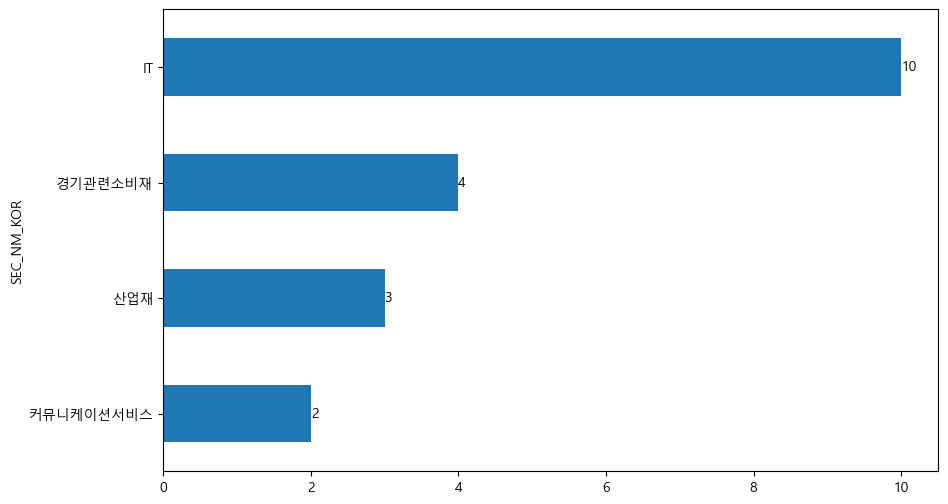

In [153]:
import matplotlib.pyplot as plt

# rank() 함수를 통해 12개월 수익률 열의 순위를 구하며, 모멘텀의 경우 지표가 높을수록 좋으므로 ascending = False 인자를 통해 내림차순으로 순위
data_bind['rank'] = data_bind['return'].rank(axis=0, ascending=False)
# 모멘텀이 높은 20 종목들의 섹터를 선택한 후, value_counts() 메서드를 통해 섹터별 갯수 계산
sector_count = pd.DataFrame(data_bind.loc[data_bind['rank'] <= 20, 'SEC_NM_KOR'].value_counts())
# sector_count = data_bind.loc[data_bind['rank'] <= 20, 'SEC_NM_KOR'].value_counts().reset_index()
# sector_count.columns = ['SEC_NM_KOR', 'count']

plt.rc('font', family='Malgun Gothic')
# barh() 함수를 통해 수평 막대 그래프
sector_count.plot.barh(figsize=(10, 6), legend=False)
# 숫자가 큰 막대가 위로 가게하기 위해 gca().invert_yaxis()를 이용해 순서를 뒤집음
plt.gca().invert_yaxis()

# annotate() 함수를 이용해 각 막대의 끝에 갯수에 해당하는 글자를 추가
for y, x in enumerate(sector_count['count']):
    plt.annotate(str(x), xy=(x, y), va='center')

# for y, x in enumerate(sector_count['SEC_NM_KOR']):
#     plt.annotate(str(x), xy=(x, y), va='center')

plt.show()

섹터 쏠림 현상을 제거한 섹터 중립 포트폴리오를 구성

In [155]:
from scipy.stats import zscore
data_bind.loc[data_bind['SEC_NM_KOR'].isnull(), 'SEC_NM_KOR'] = '기타'
data_bind['z-score'] = data_bind.groupby(
    'SEC_NM_KOR', dropna=False)['return'].apply(zscore, nan_policy='omit')
data_bind['z-rank'] = data_bind['z-score'].rank(axis=0, ascending=False)
sector_neutral_count = pd.DataFrame(data_bind.loc[data_bind['z-rank'] <= 20,
                                                  'SEC_NM_KOR'].value_counts())

plt.rc('font', family='Malgun Gothic')
sector_neutral_count.plot.barh(figsize=(10, 6), legend=False)
plt.gca().invert_yaxis()

for y, x in enumerate(sector_neutral_count['SEC_NM_KOR']):
    plt.annotate(str(x), xy=(x, y), va='center')

TypeError: incompatible index of inserted column with frame index

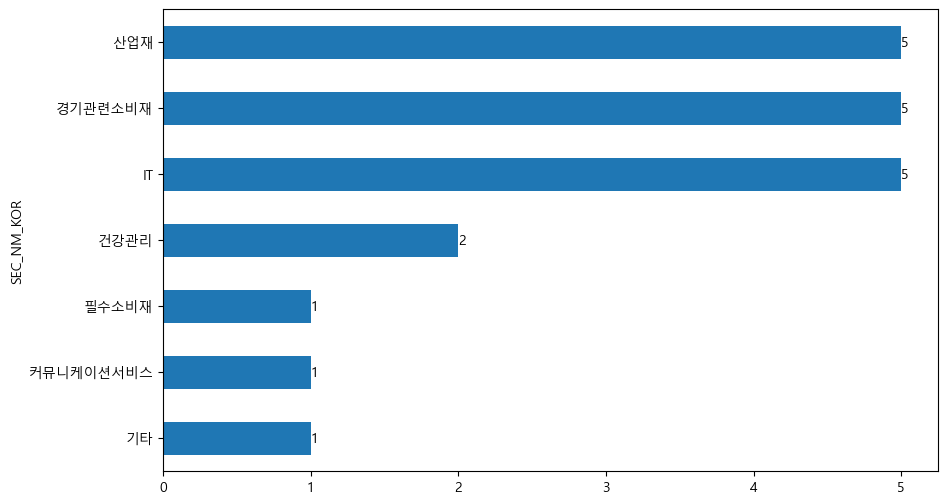

In [156]:

# '기타'로 대체
data_bind.loc[data_bind['SEC_NM_KOR'].isnull(), 'SEC_NM_KOR'] = '기타'

# z-score 계산
data_bind['z-score'] = data_bind.groupby('SEC_NM_KOR')['return'].transform(lambda x: zscore(x, nan_policy='omit'))

# z-rank 계산
data_bind['z-rank'] = data_bind['z-score'].rank(axis=0, ascending=False)

# 섹터 중립 상위 20개 종목의 수 계산
sector_neutral_count = pd.DataFrame(data_bind.loc[data_bind['z-rank'] <= 20, 'SEC_NM_KOR'].value_counts()).reset_index()
sector_neutral_count.columns = ['SEC_NM_KOR', 'count']

# 플롯 설정
plt.rc('font', family='Malgun Gothic')
sector_neutral_count.plot.barh(x='SEC_NM_KOR', y='count', figsize=(10, 6), legend=False)
plt.gca().invert_yaxis()

# 주석 추가
for y, x in enumerate(sector_neutral_count['count']):
    plt.annotate(str(x), xy=(x, y), va='center')

# 그래프 표시
plt.show()

→ groupby() 함수를 통해 손쉽게 그룹별 중립화를 할 수 있으며, 글로벌 투자를 하는 경우에는 지역, 국가, 섹터별로도 중립화된 포트폴리오를 구성하기도 한다.

### 13.8 이상치 데이터 처리 및 팩터의 결합

### 안정적인 퀀트 포트폴리오 구성
-  팩터 데이터를 어떻게 처리하고 결합할지에 대해 알아야 함.

#### 이상치(극단치, Outlier) 데이터 처리
- 모든 데이터 분석에서 중요한 문제 중 하나는 이상치 데이터를 어떻게 처리할 것인지...
- 예시:
  - 과거 12개월 수익률이 10배인 주식
  - ROE가 100%를 넘는 주식
- 이러한 이상치가 모멘텀이나 퀄리티 관점에서 좋기만 한 주식인지 고민 필요.

#### 이상치 처리 방법
- **제외**: 이상치를 제외하고 분석할지.
- **포함**: 이상치를 포함해서 분석할지.
  - 그대로 사용할 것인지.
  - 보정해 사용할 것인지 판단 필요.

PBR 데이터에서 이상치 데이터를 탐색

In [160]:
import pickle
with open('D:/01_study/qaunt/ch13/data/stock_db.pkl', 'rb') as f:
    data = pickle.load(f)

ticker_list = data[0]   # 티커
sector_list = data[1]   # 섹터
price_list = data[2]    # 주가
fs_list = data[3]       # 재무제표
value_list = data[4]    # 밸류지표(TTM)

In [161]:
value_list.head()

,종목코드,기준일,지표,값
0,000020,2024-05-08,DY,0.0205
1,000020,2024-05-08,PBR,0.6165
2,000020,2024-05-08,PCR,8.3604
3,000020,2024-05-08,PER,8.6558
4,000020,2024-05-08,PSR,0.6784


In [162]:
value_pbr = value_list[value_list['지표'] == 'PBR']

print(value_pbr['값'].max(), '\n', value_pbr['값'].min())

1607.6 
 -161.9996


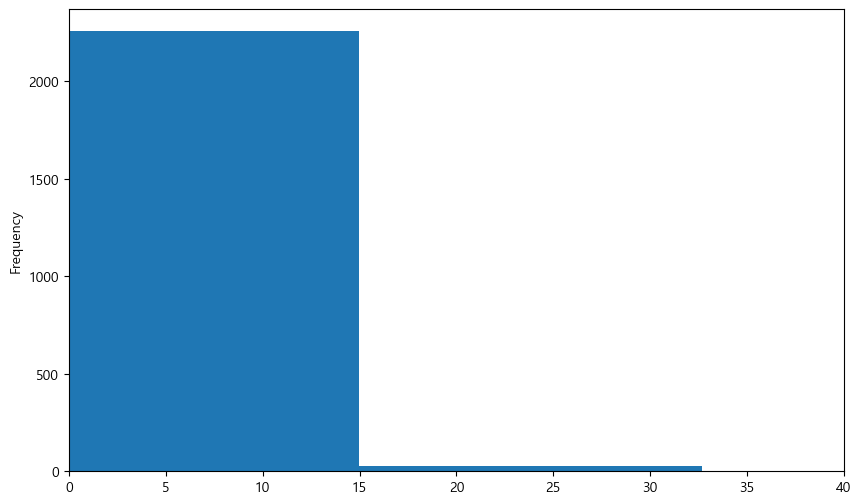

In [163]:
import matplotlib.pyplot as plt

value_pbr['값'].plot.hist(bins=100, figsize=(10, 6))
plt.xlim(0, 40)
plt.show()

데이터가 이상한지...일단 교재 데이터로 설명 계속

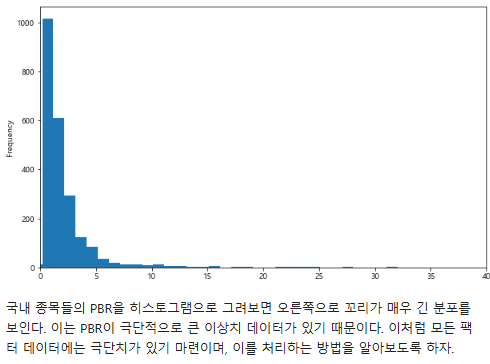

### 13.8.1 트림(Trim): 이상치 데이터 삭제

이상치에 해당하는 상하위 1% 데이터를 삭제

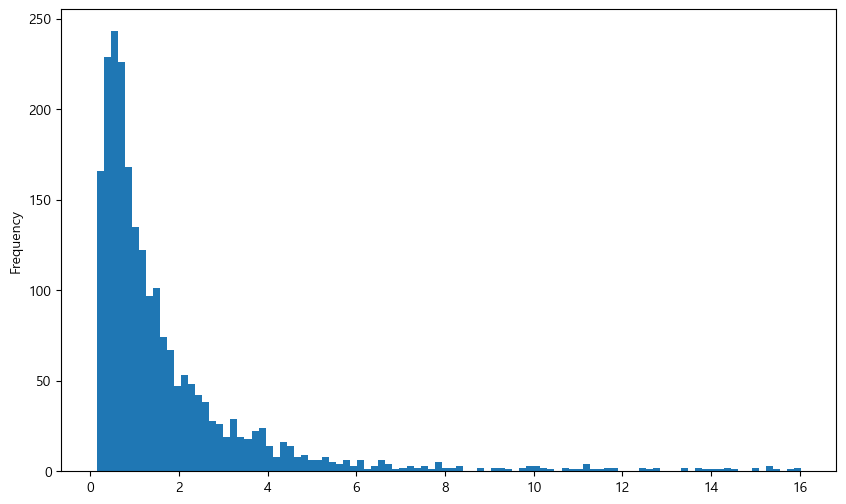

In [165]:
q_low = value_pbr['값'].quantile(0.01)
q_hi = value_pbr['값'].quantile(0.99)

value_trim = value_pbr.loc[(value_pbr['값'] > q_low) & (value_pbr['값'] < q_hi), ['값']]

value_trim.plot.hist(figsize=(10, 6), bins=100, legend=False)
plt.show()

→ 해석: quantile() 함수를 통해 백분위를 구한 후 상하위 1%에 해당하는 데이터를 제외한 데이터만 선택</br>
&nbsp;&nbsp;&nbsp;&nbsp;결과적으로 지나치게 PBR이 낮은 종목과 높은 종목은 제거되어 x축의 스케일이 많이 줄어든 모습

#### ※ 이상치 데이터 처리의 주의사항
- **통계값 계산 시**: 평균이나 분산을 구할 때는 이상치 데이터를 제거하는 것이 바람직할 수 있음.
- **포트폴리오 구성 시**: 팩터를 이용해 포트폴리오를 구성할 때는 이상치 제거를 조심스럽게 사용해야 함.
  - 데이터 손실 발생 가능성.
  - 제거된 종목 중에 정말로 좋은 종목이 있을 수도 있음.

### 13.8.2 윈저라이징(Winsorizing): 이상치 데이터 대체

이상치 데이터를 다른 데이터로 대체하는 윈저라이징 방법을 사용: 좌우로 울타리를 쳐놓고 해당 범위를 넘어가는 값을 강제로 울타리에 맞추는 방법</br>
예시. 상위 1%를 초과하는 데이터는 1% 값으로 대체하며, 하위 1% 미만의 데이터는 1% 데이터로 대체

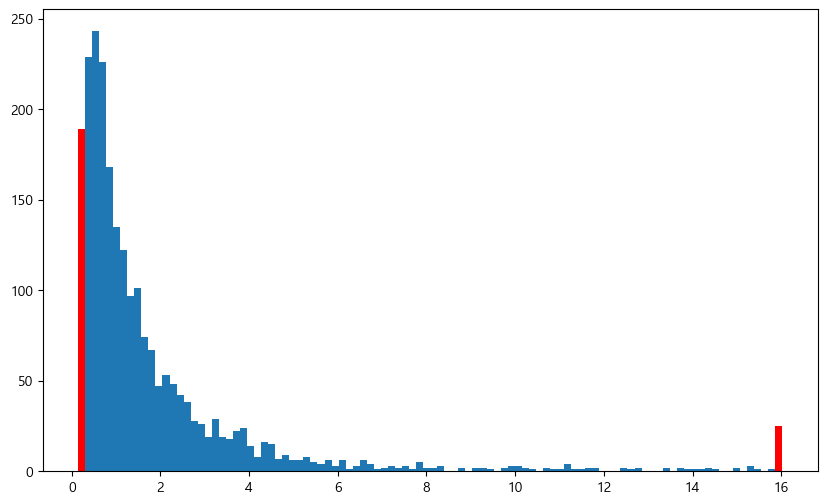

In [166]:
value_winsor = value_pbr[['값']].copy()
value_winsor.loc[value_winsor["값"] < q_low, '값'] = q_low
value_winsor.loc[value_winsor["값"] > q_hi, '값'] = q_hi

fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = plt.hist(value_winsor, bins=100)
patches[0].set_fc('red')
patches[-1].set_fc('red')
plt.show()

### 13.8.3 팩터의 결합 방법

앞서 밸류 지표, 퀄리티 지표 결합 및 마법공식 포트폴리오 구성 시 **단순 순위 합산 방법**이 사용됨.
- 투자 종목 수가 적을 경우 혹은 개인 투자자에게는 단순하고 효과적일 수 있음.

- **문제점**:
  - 전문 투자자가 포트폴리오를 구성하거나 팩터를 분석할 때는 여러 문제점을 가짐

각 밸류 지표의 순위를 구한 후 히스토그램

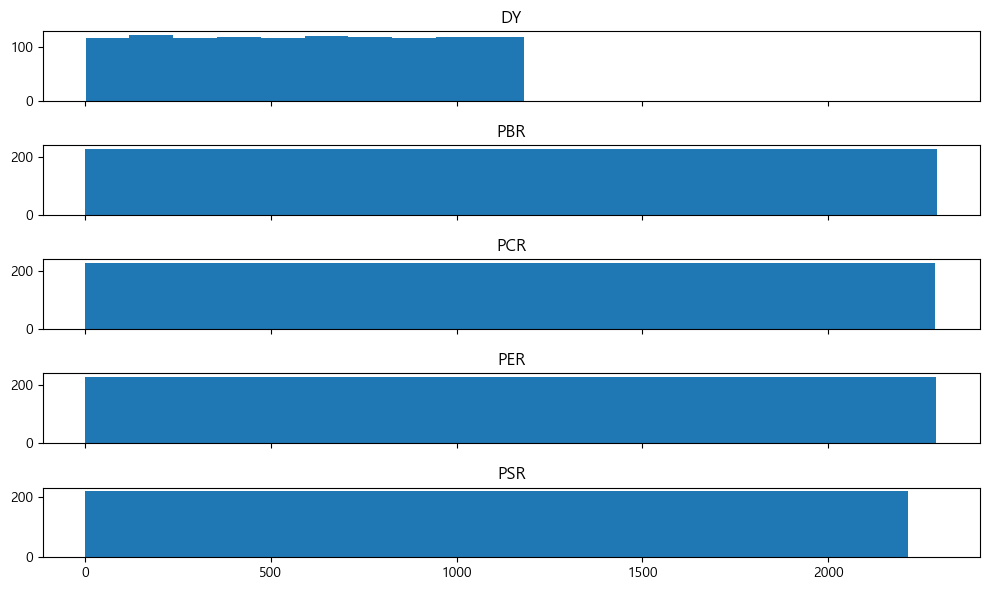

In [167]:
value_pivot = value_list.pivot(index='종목코드', columns='지표', values='값')
value_rank = value_pivot.rank(axis=0)

fig, axes = plt.subplots(5, 1, figsize=(10, 6), sharex=True)
for n, ax in enumerate(axes.flatten()):
    ax.hist(value_rank.iloc[:, n])
    ax.set_title(value_rank.columns[n], size=12)

fig.tight_layout()

→ 해석: 순위를 구하는 것의 가장 큰 장점은 극단치로 인한 효과가 사라진다는 점과 균등한 분포를 가진다는 점</br>
&nbsp;&nbsp;&nbsp;&nbsp;그러나 각 지표의 축을 보면 최댓값이 서로 다르다. 이는 지표별 결측치로 인해 유효 데이터의 갯수가 달라 나타나는 현상이다.

In [168]:
value_pivot.isna().sum()

지표
DY     1248
PBR     135
PCR     142
PER     139
PSR     215
dtype: int64

In [170]:
value_pivot.shape

(2429, 5)

서로 다른 범위의 분포를 단순히 합치는 것은 좋은 방법이 아님
- 예를 들어 A, B, C, D 팩터에 각각 비중을 25%, 25%, 25%, 25% 부여해 포트폴리오를 구성한다고 가정해보자.</br>
각 순위는 분포의 범위가 다르므로, 순위와 비중의 가중평균을 통해 포트폴리오를 구성하면 왜곡된 결과를 발생시킨다.

이러한 문제를 해결하는 가장 좋은 방법은 순위를 구한 후 이를 Z-Score로 정규화하는 것

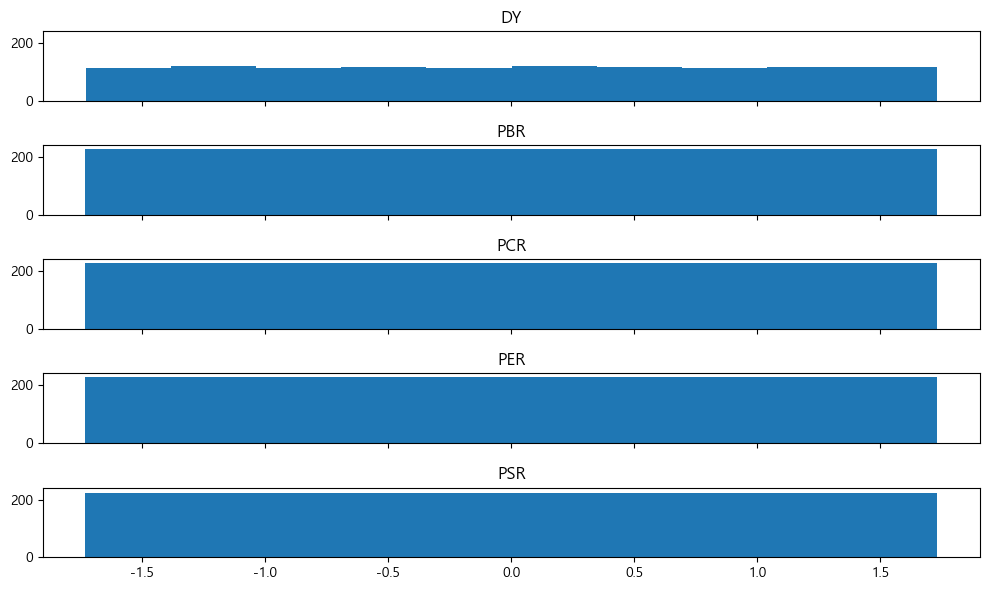

In [171]:
from scipy.stats import zscore

value_rank_z = value_rank.apply(zscore, nan_policy='omit')

fig, axes = plt.subplots(5, 1, figsize=(10, 6), sharex=True, sharey=True)
for n, ax in enumerate(axes.flatten()):
    ax.hist(value_rank_z.iloc[:, n])
    ax.set_title(value_rank.columns[n], size=12)

fig.tight_layout()
plt.show()

→ 해석: 기본적으로 순위의 분포가 가진 극단치 효과가 사라지는 점과 균등 분포의 장점을 유지하고 있으며, 분포의 범위 역시 거의 동일

여러 팩터를 결합해 포트폴리오를 구성하고자 하는 경우,</br>
먼저 각 팩터(지표)별 순위를 구한 후 이를 정규화한 뒤 더해야 왜곡 효과가 제거되어 안정적인 포트폴리오가 됨

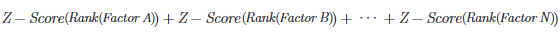

## 13.9 멀티팩터 포트폴리오

앞에서 배웠던 팩터 이론들과 결합 방법들을 응용해 멀티팩터 포트폴리오를 구성

각 팩터에 사용되는 지표
- 퀄리티: 자기자본이익률(ROE), 매출총이익(GPA), 영업활동현금흐름(CFO)
- 밸류: PER, PBR, PSR, PCR, DY
- 모멘텀: 12개월 수익률, K-Ratio

# 13.9 실습은 코드 에러 디버깅 중...일단 여기까지...

In [172]:
fs_list = fs_list.sort_values(['종목코드', '계정', '기준일'])
fs_list['ttm'] = fs_list.groupby(['종목코드', '계정'], as_index=False)['값'].rolling(
    window=4, min_periods=4).sum()['값']
fs_list_clean = fs_list.copy()
fs_list_clean['ttm'] = np.where(fs_list_clean['계정'].isin(['자산', '지배기업주주지분']),
                                fs_list_clean['ttm'] / 4, fs_list_clean['ttm'])
fs_list_clean = fs_list_clean.groupby(['종목코드', '계정']).tail(1)

fs_list_pivot = fs_list_clean.pivot(index='종목코드', columns='계정', values='ttm')
fs_list_pivot['ROE'] = fs_list_pivot['당기순이익'] / fs_list_pivot['자본']
fs_list_pivot['GPA'] = fs_list_pivot['매출총이익'] / fs_list_pivot['자산']
fs_list_pivot['CFO'] = fs_list_pivot['영업활동으로인한현금흐름'] / fs_list_pivot['자산']

fs_list_pivot.round(4).head()

계정,(재무활동으로 인한 현금유출액),(재무활동으로인한현금유출액),(투자활동으로 인한 현금유출액),(투자활동으로인한현금유출액),(현금 유입이 없는 수익 등 차감),(현금유입이없는수익등차감),*감가상각누계액,*기타예수유가증권,*대손충당금,*대출채권명목금액,...,현금유출이없는비용등가산,환급금비용,환매조건부채권매도의감소,환매조건부채권매도의증가,환율변동효과,후순위사채의발행,후순위사채의상환,ROE,GPA,CFO
종목코드,,,,,,,,,,,,,,,,,,,,,
000020,NaN,101.0,NaN,1313.0,NaN,364.0,NaN,NaN,NaN,NaN,...,605.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0271,0.6245,0.0860
000040,NaN,231.0,NaN,21.0,NaN,171.0,NaN,NaN,NaN,NaN,...,391.0,NaN,NaN,NaN,-4.0,NaN,NaN,-0.4033,0.0570,-0.0916
000050,NaN,3737.0,NaN,1076.0,NaN,726.0,NaN,NaN,NaN,NaN,...,1668.0,NaN,NaN,NaN,21.0,NaN,NaN,-0.0078,0.1673,0.0694
000070,NaN,10489.0,NaN,29710.0,NaN,5549.0,NaN,NaN,NaN,NaN,...,4831.0,NaN,NaN,NaN,-1.0,NaN,NaN,0.0388,0.1922,0.1174
000080,NaN,1608.0,NaN,4206.0,NaN,279.0,NaN,NaN,NaN,NaN,...,5256.0,NaN,NaN,NaN,-55.0,NaN,NaN,0.0110,0.5851,0.0620


퀄리티 지표를 계산하기 위해 TTM 기준 ROE, GPA, CFO를 계산

In [173]:
value_list.loc[value_list['값'] <= 0, '값'] = np.nan
value_pivot = value_list.pivot(index='종목코드', columns='지표', values='값')

value_pivot.head()

지표,DY,PBR,PCR,PER,PSR
종목코드,,,,,
000020,0.0205,0.6165,8.3604,8.6558,0.6784
000040,NaN,1.1720,NaN,NaN,0.3891
000050,0.0161,0.2860,4.6089,NaN,0.5399
000070,0.0518,0.2171,1.8926,2.5504,0.1803
000080,0.0469,1.2691,8.6440,40.0059,0.5635


가치 지표의 경우 음수를 제거한 후 행으로 긴 형태로 변경

In [174]:
price_pivot = price_list.pivot(index='날짜', columns='종목코드', values='종가')
ret_list = pd.DataFrame(data=(price_pivot.iloc[-1] / price_pivot.iloc[0]) - 1,
                        columns=['12M'])

ret = price_pivot.pct_change().iloc[1:]
ret_cum = np.log(1 + ret).cumsum()

x = np.array(range(len(ret)))
k_ratio = {}

for i in range(0, len(ticker_list)):

    ticker = ticker_list.loc[i, '종목코드']

    try:
        y = ret_cum.loc[:, price_pivot.columns == ticker]
        reg = sm.OLS(y, x).fit()
        res = float(reg.params / reg.bse)
    except:
        res = np.nan

    k_ratio[ticker] = res

k_ratio_bind = pd.DataFrame.from_dict(k_ratio, orient='index').reset_index()
k_ratio_bind.columns = ['종목코드', 'K_ratio']

k_ratio_bind.head()

C:\Users\naare\AppData\Local\Temp\ipykernel_9048\2153522574.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ret = price_pivot.pct_change().iloc[1:]
C:\Users\naare\AppData\Local\Temp\ipykernel_9048\2153522574.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  res = float(reg.params / reg.bse)


,종목코드,K_ratio
0,000020,88.104684
1,000040,-234.960196
2,000050,-19.957760
3,000070,19.085272
4,000075,NaN


먼저 가격 테이블을 이용해 최근 12개월 수익률을 구하고 로그 누적수익률을 통해 각 종목 별 K-Ratio를 계산

In [175]:
# 티커, 섹터, 퀄리티, 밸류, 12개월 수익률, K-ratio 테이블을 하나로 합치기
data_bind = ticker_list[['종목코드', '종목명']].merge(
    sector_list[['CMP_CD', 'SEC_NM_KOR']],
    how='left',
    left_on='종목코드',
    right_on='CMP_CD').merge(
        fs_list_pivot[['ROE', 'GPA', 'CFO']], how='left',
        on='종목코드').merge(value_pivot, how='left', on='종목코드').merge(ret_list, how='left', on='종목코드').merge(k_ratio_bind, how='left', on='종목코드')

# 섹터 정보가 없는 경우 '기타'를 입력
data_bind.loc[data_bind['SEC_NM_KOR'].isnull(), 'SEC_NM_KOR'] = '기타'
# CMP_CD(종목코드)는 중복되는 열이므로 drop() 메서드를 통해 제거
data_bind = data_bind.drop(['CMP_CD'], axis=1)

data_bind.round(4).head()

,종목코드,종목명,SEC_NM_KOR,ROE,GPA,CFO,DY,PBR,PCR,PER,PSR,12M,K_ratio
0,000020,동화약품,건강관리,0.0271,0.6245,0.0860,0.0205,0.6165,8.3604,8.6558,0.6784,0.4545,88.1047
1,000040,KR모터스,경기관련소비재,-0.4033,0.0570,-0.0916,NaN,1.1720,NaN,NaN,0.3891,-0.9459,-234.9602
2,000050,경방,경기관련소비재,-0.0078,0.1673,0.0694,0.0161,0.2860,4.6089,NaN,0.5399,-0.4211,-19.9578
3,000070,삼양홀딩스,소재,0.0388,0.1922,0.1174,0.0518,0.2171,1.8926,2.5504,0.1803,-0.0160,19.0853
4,000075,삼양홀딩스우,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


각 섹터별로 아웃라이어를 제거한 후 순위와 Z-Score를 구하는 함수 col_clean

In [176]:
# cutoff 즉 아웃라이어는 1%로 설정하며, asc는 False로 설정
def col_clean(df, cutoff=0.01, asc=False):

    # 아웃라이어 기준에 해당하는 q_low와 q_hi을 계산
    q_low = df.quantile(cutoff)
    q_hi = df.quantile(1 - cutoff)

    # 트림 방법을 통해 이상치 데이터를 제외한 값을 선택
    df_trim = df[(df > q_low) & (df < q_hi)]

    # 만일 asc가 False일 경우 순위를 ascending = False 즉 내림차순으로 계산
    # 만일 asc가 True일 경우에는 순위를 ascending = True 즉 오름차순으로 계산
    # apply() 메서드를 통해 zscore를 계산
    if asc == False:
        df_z_score = df_trim.rank(axis=0, ascending=False).apply(
            zscore, nan_policy='omit')
    if asc == True:
        df_z_score = df_trim.rank(axis=0, ascending=True).apply(
            zscore, nan_policy='omit')

    return(df_z_score)

각 팩터에 col_clean 적용

In [179]:
# 종목코드와 섹터정보(SEC_NM_KOR)를 인덱스로 설정한 후, 섹터에 따른 그룹
data_bind_group = data_bind.set_index(['종목코드', 'SEC_NM_KOR']).groupby('SEC_NM_KOR')

data_bind_group.head(1).round(4)

,,종목명,ROE,GPA,CFO,DY,PBR,PCR,PER,PSR,12M,K_ratio
종목코드,SEC_NM_KOR,,,,,,,,,,,
000020,건강관리,동화약품,0.0271,0.6245,0.0860,0.0205,0.6165,8.3604,8.6558,0.6784,0.4545,88.1047
000040,경기관련소비재,KR모터스,-0.4033,0.0570,-0.0916,NaN,1.1720,NaN,NaN,0.3891,-0.9459,-234.9602
000070,소재,삼양홀딩스,0.0388,0.1922,0.1174,0.0518,0.2171,1.8926,2.5504,0.1803,-0.0160,19.0853
000075,기타,삼양홀딩스우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000080,필수소비재,하이트진로,0.0110,0.5851,0.0620,0.0469,1.2691,8.6440,40.0059,0.5635,-0.1226,22.4214
000120,산업재,CJ대한통운,0.0266,0.2407,0.1639,0.0038,0.7163,3.5421,12.2048,0.2518,0.0709,20.6971
000370,금융,한화손해보험,0.0249,NaN,0.1765,0.0402,0.1719,0.3668,2.7292,NaN,-0.0336,-20.0056
000440,에너지,중앙에너비스,-0.0026,0.2945,0.0651,0.0156,2.2292,60.6405,NaN,2.2945,4.0482,179.9853
000660,IT,SK하이닉스,-0.0714,0.0057,0.1042,0.0067,2.2814,30.2901,NaN,3.9549,3.3454,142.6092


첫번째로 퀄리티 지표의 Z-Score를 계산

In [182]:
z_quality.head()

z_quality
SEC_NM_KOR 종목코드   SEC_NM_KOR           
IT         000660 IT           2.508669
           000670 IT           1.967963
           000990 IT          -3.287324
           001000 IT           2.625151
           001210 IT                NaN

In [184]:
data_bind.head()

,종목코드,종목명,SEC_NM_KOR,ROE,GPA,CFO,DY,PBR,PCR,PER,PSR,12M,K_ratio
0,000020,동화약품,건강관리,0.027089,0.624548,0.086013,0.0205,0.6165,8.3604,8.6558,0.6784,0.454545,88.104684
1,000040,KR모터스,경기관련소비재,-0.403279,0.057017,-0.091634,NaN,1.1720,NaN,NaN,0.3891,-0.945897,-234.960196
2,000050,경방,경기관련소비재,-0.007806,0.167273,0.069444,0.0161,0.2860,4.6089,NaN,0.5399,-0.421053,-19.957760
3,000070,삼양홀딩스,소재,0.038843,0.192227,0.117385,0.0518,0.2171,1.8926,2.5504,0.1803,-0.015965,19.085272
4,000075,삼양홀딩스우,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
z_quality = data_bind_group[['ROE', 'GPA', 'CFO'
                             ]].apply(lambda x: col_clean(x, 0.01, False)).sum(
                                 axis=1, skipna=False).to_frame('z_quality')
z_quality = z_quality.rename_axis('index_temp').reset_index()
data_bind = data_bind.merge(z_quality, how='left', on=['종목코드', 'SEC_NM_KOR'])

data_bind.round(4).head()

TypeError: Must pass list-like as `names`.

In [187]:
value_1 = data_bind_group[['PBR', 'PCR', 'PER',
                           'PSR']].apply(lambda x: col_clean(x, 0.01, True))
value_2 = data_bind_group[['DY']].apply(lambda x: col_clean(x, 0.01, False))

z_value = value_1.merge(value_2, on=['종목코드', 'SEC_NM_KOR'
                                     ]).sum(axis=1,
                                            skipna=False).to_frame('z_value')
data_bind = data_bind.merge(z_value, how='left', on=['종목코드', 'SEC_NM_KOR'])

data_bind.round(4).head()

ValueError: The name SEC_NM_KOR occurs multiple times, use a level number